In [ ]:
import torch

if torch.cuda.is_available():
    print("GPU is available!")
    print(f"GPU name: {torch.cuda.get_device_name(0)}")
else:
    print("GPU is NOT available - using CPU instead")

GPU is available!
GPU name: Tesla T4


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#  Specify the file path (adjust this to your file's location)
file_path = '/content/drive/MyDrive/PowerAI_dataset/merged_dataset.csv'  # Change this to your actual file path

In [ ]:
# Read the CSV file using pandas
try:
    df = pd.read_csv(file_path)
    print("File loaded successfully!")
    # Display the first few rows
    print("\nFirst 5 rows of the dataframe:")
    print(df.head())
except FileNotFoundError:
    print(f"File not found at path: {file_path}")
except Exception as e:
    print(f"An error occurred: {str(e)}")

File loaded successfully!

First 5 rows of the dataframe:
   id            data_hora  ups_work_mode  ups_va_in  ups_vb_in  ups_vc_in  \
0   1  2024-10-31 20:31:19              4      233.0      233.1      233.6   
1   2  2024-10-31 20:31:29              4      233.1      232.9      233.3   
2   3  2024-10-31 20:31:39              4      232.8      233.0      233.4   
3   4  2024-10-31 20:31:49              4      232.9      233.1      233.5   
4   5  2024-10-31 20:32:00              4      232.9      233.1      233.5   

   ups_hz_in  ups_va_out  ups_vb_out  ups_vc_out  ...  pdu5_kwh  pdu6_i  \
0       60.0       219.0       219.2       220.1  ...    3646.7    6.33   
1       59.9       219.2       219.2       219.9  ...    3646.7    6.25   
2       59.9       219.4       219.2       220.1  ...    3646.7    6.35   
3       59.8       219.4       219.4       220.1  ...    3646.7    6.30   
4       59.9       219.0       219.2       219.9  ...    3646.7    6.30   

   pdu6_fp  pdu6_kwh  

In [ ]:
df.head()

,id,data_hora,ups_work_mode,ups_va_in,ups_vb_in,ups_vc_in,ups_hz_in,ups_va_out,ups_vb_out,ups_vc_out,...,pdu5_kwh,pdu6_i,pdu6_fp,pdu6_kwh,pdu7_i,pdu7_fp,pdu7_kwh,pdu8_i,pdu8_fp,pdu8_kwh
0,1,2024-10-31 20:31:19,4,233.0,233.1,233.6,60.0,219.0,219.2,220.1,...,3646.7,6.33,0.89,3734.2,5.68,0.96,2544.8,4.52,0.95,2242.8
1,2,2024-10-31 20:31:29,4,233.1,232.9,233.3,59.9,219.2,219.2,219.9,...,3646.7,6.25,0.89,3734.2,5.63,0.95,2544.8,4.43,0.95,2242.8
2,3,2024-10-31 20:31:39,4,232.8,233.0,233.4,59.9,219.4,219.2,220.1,...,3646.7,6.35,0.89,3734.2,5.63,0.95,2544.8,4.45,0.95,2242.8
3,4,2024-10-31 20:31:49,4,232.9,233.1,233.5,59.8,219.4,219.4,220.1,...,3646.7,6.30,0.88,3734.2,5.83,0.94,2544.8,4.43,0.95,2242.8
4,5,2024-10-31 20:32:00,4,232.9,233.1,233.5,59.9,219.0,219.2,219.9,...,3646.7,6.30,0.88,3734.2,5.63,0.96,2544.8,4.44,0.94,2242.8


In [ ]:
print(f" Merged shape: {df.shape}")

 Merged shape: (704248, 165)


In [ ]:
df.drop(columns=['id'], inplace=True)

In [ ]:
df.head(3)

,data_hora,ups_work_mode,ups_va_in,ups_vb_in,ups_vc_in,ups_hz_in,ups_va_out,ups_vb_out,ups_vc_out,ups_hz_out,...,pdu5_kwh,pdu6_i,pdu6_fp,pdu6_kwh,pdu7_i,pdu7_fp,pdu7_kwh,pdu8_i,pdu8_fp,pdu8_kwh
0,2024-10-31 20:31:19,4,233.0,233.1,233.6,60.0,219.0,219.2,220.1,59.8,...,3646.7,6.33,0.89,3734.2,5.68,0.96,2544.8,4.52,0.95,2242.8
1,2024-10-31 20:31:29,4,233.1,232.9,233.3,59.9,219.2,219.2,219.9,60.0,...,3646.7,6.25,0.89,3734.2,5.63,0.95,2544.8,4.43,0.95,2242.8
2,2024-10-31 20:31:39,4,232.8,233.0,233.4,59.9,219.4,219.2,220.1,59.8,...,3646.7,6.35,0.89,3734.2,5.63,0.95,2544.8,4.45,0.95,2242.8


# Dataset split

#### **general description of the columns (met_1 & met_2)**

- **1. Voltage Measurements**
  - **`met_va_1`, `met_vb_1`, `met_vc_1`**: Phase A, B, and C voltage measurements for Meter 1.
  - **`met_va_2`, `met_vb_2`, `met_vc_2`**: Phase A, B, and C voltage measurements for Meter 2.
  - **`met_v_1`, `met_v_2`**: Average voltage measurements for Meter 1 and Meter 2.
  - **`met_v_imb_1`, `met_v_imb_2`**: Voltage imbalance indicators for Meter 1 and Meter 2.

**Purpose**:
- Useful for monitoring power quality and detecting voltage fluctuations or imbalances.

---

- **2. Current Measurements**
  - **`met_ia_1`, `met_ib_1`, `met_ic_1`**: Phase A, B, and C current measurements for Meter 1.
  - **`met_ia_2`, `met_ib_2`, `met_ic_2`**: Phase A, B, and C current measurements for Meter 2.
  - **`met_i_1`, `met_i_2`**: Average current measurements for Meter 1 and Meter 2.
  - **`met_in_1`, `met_in_2`**: Neutral current measurements for Meter 1 and Meter 2.
  - **`met_i_imb_1`, `met_i_imb_2`**: Current imbalance indicators for Meter 1 and Meter 2.
  - **`met_i_leak_1`, `met_i_leak_2`**: Current leakage measurements for Meter 1 and Meter 2.

**Purpose**:
- Useful for load monitoring and detecting overloading, imbalance, or leakage.

---

- **3. Power Measurements**
  - **`met_pa_1`, `met_pb_1`, `met_pc_1`**: Active power measurements for Phase A, B, and C for Meter 1.
  - **`met_pa_2`, `met_pb_2`, `met_pc_2`**: Active power measurements for Phase A, B, and C for Meter 2.
  - **`met_p_1`, `met_p_2`**: Total active power measurements for Meter 1 and Meter 2.
  - **`met_sa_1`, `met_sb_1`, `met_sc_1`**: Apparent power measurements for Phase A, B, and C for Meter 1.
  - **`met_sa_2`, `met_sb_2`, `met_sc_2`**: Apparent power measurements for Phase A, B, and C for Meter 2.
  - **`met_fpa_1`, `met_fpb_1`, `met_fpc_1`**: Power factor measurements for Phase A, B, and C for Meter 1.
  - **`met_fpa_2`, `met_fpb_2`, `met_fpc_2`**: Power factor measurements for Phase A, B, and C for Meter 2.

**Purpose**:
- Useful for energy consumption analysis and detecting abnormal power usage or efficiency issues.

---

- ##### **4. Sequence Components**
    - #### Voltage Sequence Components:
      - **`met_va_seq_p_1`, `met_va_seq_n_1`, `met_va_zero_n_1`**: Positive, negative, and zero sequence voltage components for Meter 1.
      - **`met_va_seq_p_2`, `met_va_seq_n_2`, `met_va_zero_n_2`**: Positive, negative, and zero sequence voltage components for Meter 2.

    - #### Current Sequence Components:
      - **`met_ia_seq_p_1`, `met_ia_seq_n_1`, `met_ia_zero_n_1`**: Positive, negative, and zero sequence current components for Meter 1.
      - **`met_ia_seq_p_2`, `met_ia_seq_n_2`, `met_ia_zero_n_2`**: Positive, negative, and zero sequence current components for Meter 2.

**Purpose**:
- Useful for detecting unbalanced conditions and identifying harmonics in the system.


In [ ]:
# Split general dataset into Meter 1 full sets
df_met1 = df[[col for col in df.columns if '_1' in col] + ['data_hora']].copy()

In [ ]:
df_met1.columns

Index(['met_va_1', 'met_vb_1', 'met_vc_1', 'met_v_1', 'met_hz_1', 'met_ia_1',
       'met_ib_1', 'met_ic_1', 'met_i_1', 'met_in_1', 'met_pa_1', 'met_pb_1',
       'met_pc_1', 'met_p_1', 'met_sa_1', 'met_sb_1', 'met_sc_1', 'met_s_1',
       'met_fpa_1', 'met_fpb_1', 'met_fpc_1', 'met_fp_1', 'met_kwh_1',
       'met_kvah_1', 'met_kvah_neg_1', 'met_va_seq_p_1', 'met_va_seq_n_1',
       'met_va_zero_n_1', 'met_va_groud_1', 'met_v_imb_1', 'met_ia_seq_p_1',
       'met_ia_seq_n_1', 'met_ia_zero_n_1', 'met_i_imb_1', 'met_i_leak_1',
       'met_kwh_month_1', 'met_kwh_jan_1', 'met_kwh_feb_1', 'met_kwh_mar_1',
       'met_kwh_apr_1', 'met_kwh_may_1', 'met_kwh_jun_1', 'met_kwh_jul_1',
       'met_kwh_aug_1', 'met_kwh_set_1', 'met_kwh_oct_1', 'met_kwh_nov_1',
       'met_kwh_dec_1', 'met_kwh_y_1', 'met_kwh_1y_1', 'met_kwh_1y_2',
       'data_hora'],
      dtype='object')

In [ ]:
# Split general dataset into  Meter 2 full sets
df_met2 = df[[col for col in df.columns if '_2' in col] + ['data_hora']].copy()

In [ ]:
df_met2.columns

Index(['met_va_2', 'met_vb_2', 'met_vc_2', 'met_v_2', 'met_hz_2', 'met_ia_2',
       'met_ib_2', 'met_ic_2', 'met_i_2', 'met_in_2', 'met_pa_2', 'met_pb_2',
       'met_pc_2', 'met_p_2', 'met_sa_2', 'met_sb_2', 'met_sc_2', 'met_s_2',
       'met_fpa_2', 'met_fpb_2', 'met_fpc_2', 'met_fp_2', 'met_kwh_2',
       'met_kvah_2', 'met_kvah_neg_2', 'met_va_seq_p_2', 'met_va_seq_n_2',
       'met_va_zero_n_2', 'met_va_groud_2', 'met_v_imb_2', 'met_ia_seq_p_2',
       'met_ia_seq_n_2', 'met_ia_zero_n_2', 'met_i_imb_2', 'met_i_leak_2',
       'met_kwh_month_2', 'met_kwh_jan_2', 'met_kwh_feb_2', 'met_kwh_mar_2',
       'met_kwh_apr_2', 'met_kwh_may_2', 'met_kwh_jun_2', 'met_kwh_jul_2',
       'met_kwh_aug_2', 'met_kwh_set_2', 'met_kwh_oct_2', 'met_kwh_nov_2',
       'met_kwh_dec_2', 'met_kwh_y_2', 'met_kwh_1y_2', 'data_hora'],
      dtype='object')

In [ ]:
def window_dataframe(df, window_size=12):
    """
    Returns a DataFrame with columns grouped by variable, then window index.
    E.g., va-1-1, va-1-2, ..., vb-1-1, vb-1-2, ...
    """
    n_rows = df.shape[0]
    n_windows = n_rows // window_size
    df_trunc = df.iloc[:n_windows * window_size]
    data = df_trunc.values.reshape(n_windows, window_size, df.shape[1])
    # Build new column names: for each variable, all window steps
    new_columns = []
    for col in df.columns:
        for i in range(window_size):
            base = col.replace('met_', '').replace('_1', '')
            new_columns.append(f"{base}-1-{i+1}")
    # Transpose axes to get all time steps for each variable together
    data_2d = data.transpose(0,2,1).reshape(n_windows, -1)
    return pd.DataFrame(data_2d, columns=new_columns)

Windowing: The function **window_dataframe** converts your time series into windows (e.g., 16 consecutive samples become one row, with columns for each variable and time step).

# **Met_1 data**

**df_met1**

Contains features from Meter 1 focused on voltage, current, power factor, and harmonic indicators.

In [ ]:
# Split met_1 data
df_met1_v = df_met1[['met_va_1', 'met_vb_1', 'met_vc_1', 'met_v_1']].copy()
df_met1_i = df_met1[['met_ia_1', 'met_ib_1', 'met_ic_1', 'met_i_1', 'met_in_1']].copy()
df_met1_fp = df_met1[['met_fpa_1', 'met_fpb_1', 'met_fpc_1', 'met_fp_1']].copy()
df_met1_seq = df_met1[['met_ia_seq_p_1', 'met_ia_seq_n_1', 'met_ia_zero_n_1', 'met_i_imb_1', 'met_i_leak_1']].copy()


## Meter 1 - voltage data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Dropout, LeakyReLU
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Supervisor anomaly intervals
supervisor_anomalies = [
    (pd.Timestamp('2025-01-04 06:40'), pd.Timestamp('2025-01-04 06:42')),
    (pd.Timestamp('2025-01-04 10:33'), pd.Timestamp('2025-01-04 10:35')),
    (pd.Timestamp('2025-02-10 13:39'), pd.Timestamp('2025-02-10 13:41')),
    (pd.Timestamp('2025-02-14 19:21'), pd.Timestamp('2025-02-14 19:23')),
    (pd.Timestamp('2025-02-14 21:30'), pd.Timestamp('2025-02-14 21:33')),
]

# Evaluation helpers
def is_true_positive(ts, intervals):
    return any(start <= ts <= end for start, end in intervals)

def compare_anomalies(detected_indices, intervals):
    true_positives = [ts for ts in detected_indices if is_true_positive(ts, intervals)]
    false_positives = [ts for ts in detected_indices if not is_true_positive(ts, intervals)]
    false_negatives = [interval for interval in intervals if not any(is_true_positive(ts, [interval]) for ts in detected_indices)]
    return true_positives, false_positives, false_negatives

def window_dataframe(df, window_size=12):
    n_rows = df.shape[0]
    n_windows = n_rows // window_size
    df_trunc = df.iloc[:n_windows * window_size]
    data = df_trunc.values.reshape(n_windows, window_size, df.shape[1])
    new_columns = []
    for col in df.columns:
        for i in range(window_size):
            base = col.replace('met_', '').replace('_1', '')
            new_columns.append(f"{base}-1-{i+1}")
    data_2d = data.transpose(0, 2, 1).reshape(n_windows, -1)
    return pd.DataFrame(data_2d, columns=new_columns)

def build_autoencoder(input_dim):
    model = Sequential()
    model.add(Dense(64, input_shape=(input_dim,), kernel_regularizer=regularizers.l2(1e-4)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.1))
    model.add(Dense(32, kernel_regularizer=regularizers.l2(1e-4)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(16, kernel_regularizer=regularizers.l2(1e-4)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(64))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(input_dim, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    return model

def build_lstm_autoencoder(seq_len, n_features):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(seq_len, n_features)),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),
        RepeatVector(seq_len),
        LSTM(32, return_sequences=True),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),
        LSTM(64, return_sequences=True),
        LeakyReLU(alpha=0.1),
        TimeDistributed(Dense(n_features))
    ])
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')
    return model

# Multi-window-size analysis
window_sizes = [12, 16, 25] # 2, 3 and 5 minutes window size
results = []
phases = ['va', 'vb', 'vc', 'v']

for window_size in window_sizes:
    df_met1_v = df_met1[['met_va_1', 'met_vb_1', 'met_vc_1', 'met_v_1']].copy()
    df_met1_v_win = window_dataframe(df_met1_v, window_size=window_size)
    df_met1_v_win_plot = df_met1_v_win.copy()

    for phase in phases:
        cols = [f"{phase}-1-{i+1}" for i in range(window_size)]
        df_met1_v_win_plot[f"{phase}_mean"] = df_met1_v_win_plot[cols].mean(axis=1)

    timestamps = df_met1['data_hora'].sort_values().values
    n_windows = len(df_met1_v_win_plot)
    window_timestamps = [timestamps[(i+1)*window_size - 1] for i in range(n_windows)]
    df_met1_v_win_plot['window_time'] = pd.to_datetime(window_timestamps)
    df_met1_v_win_plot = df_met1_v_win_plot.set_index('window_time')

    test_start = pd.to_datetime('2024-12-29')
    test_end = pd.to_datetime('2025-02-23')
    test_mask = (df_met1_v_win_plot.index >= test_start) & (df_met1_v_win_plot.index <= test_end)
    df_test_win = df_met1_v_win_plot[test_mask].copy()
    df_train_win = df_met1_v_win_plot[~test_mask].copy()

    X_train_volt = df_train_win.drop(columns=[c for c in df_train_win.columns if c.endswith('_mean')])
    X_test_volt = df_test_win.drop(columns=[c for c in df_test_win.columns if c.endswith('_mean')])

    # === Autoencoder ===
    scaler_ae = StandardScaler()
    X_train_ae_volt = scaler_ae.fit_transform(X_train_volt)
    X_test_ae_volt = scaler_ae.transform(X_test_volt)

    model_ae = build_autoencoder(X_train_ae_volt.shape[1])
    model_ae.fit(X_train_ae_volt, X_train_ae_volt, epochs=30, batch_size=32, validation_split=0.1,
                 callbacks=[EarlyStopping(patience=5, restore_best_weights=True)], verbose=0)

    recon_ae_volt = model_ae.predict(X_test_ae_volt)
    recon_err_ae_volt = np.mean((X_test_ae_volt - recon_ae_volt)**2, axis=1)
    thresh_ae_volt = np.percentile(recon_err_ae_volt, 99.8)
    labels_ae_volt = (recon_err_ae_volt > thresh_ae_volt).astype(int)

    # === LSTM ===
    scaler_lstm = MinMaxScaler()
    X_train_lstm_volt = scaler_lstm.fit_transform(X_train_volt)
    X_test_lstm_volt = scaler_lstm.transform(X_test_volt)
    X_train_seq_volt = X_train_lstm_volt.reshape(-1, window_size, 4)
    X_test_seq_volt = X_test_lstm_volt.reshape(-1, window_size, 4)

    model_lstm = build_lstm_autoencoder(window_size, 4)
    model_lstm.fit(X_train_seq_volt, X_train_seq_volt, epochs=30, batch_size=32, validation_split=0.1,
                   callbacks=[EarlyStopping(patience=5, restore_best_weights=True)], verbose=0)

    recon_lstm_volt = model_lstm.predict(X_test_seq_volt)
    recon_err_lstm_volt = np.mean(np.square(X_test_seq_volt - recon_lstm_volt), axis=(1, 2))
    thresh_lstm_volt = np.percentile(recon_err_lstm_volt, 99.8)
    labels_lstm_volt = (recon_err_lstm_volt > thresh_lstm_volt).astype(int)

    # Compare to supervisor labels
    detected_ae = df_test_win.index[labels_ae_volt == 1]
    detected_lstm = df_test_win.index[labels_lstm_volt == 1]
    tp_ae, fp_ae, fn_ae = compare_anomalies(detected_ae, supervisor_anomalies)
    tp_lstm, fp_lstm, fn_lstm = compare_anomalies(detected_lstm, supervisor_anomalies)

    results.append({
        "Model": "Autoencoder", "Window Size": window_size, "Total Detected": len(detected_ae),
        "True Positives": len(tp_ae), "False Positives": len(fp_ae), "False Negatives": len(fn_ae)
    })
    results.append({
        "Model": "LSTM", "Window Size": window_size, "Total Detected": len(detected_lstm),
        "True Positives": len(tp_lstm), "False Positives": len(fp_lstm), "False Negatives": len(fn_lstm)
    })


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


692/692 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


692/692 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


519/519 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


332/332 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [ ]:
# Show summary
summary_voltage_1 = pd.DataFrame(results)
summary_voltage_1

,Model,Window Size,Total Detected,True Positives,False Positives,False Negatives
0,Autoencoder,12,45,3,42,2
1,LSTM,12,45,2,43,3
2,Autoencoder,16,34,3,31,2
3,LSTM,16,34,2,32,3
4,Autoencoder,25,22,0,22,5
5,LSTM,25,22,0,22,5


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


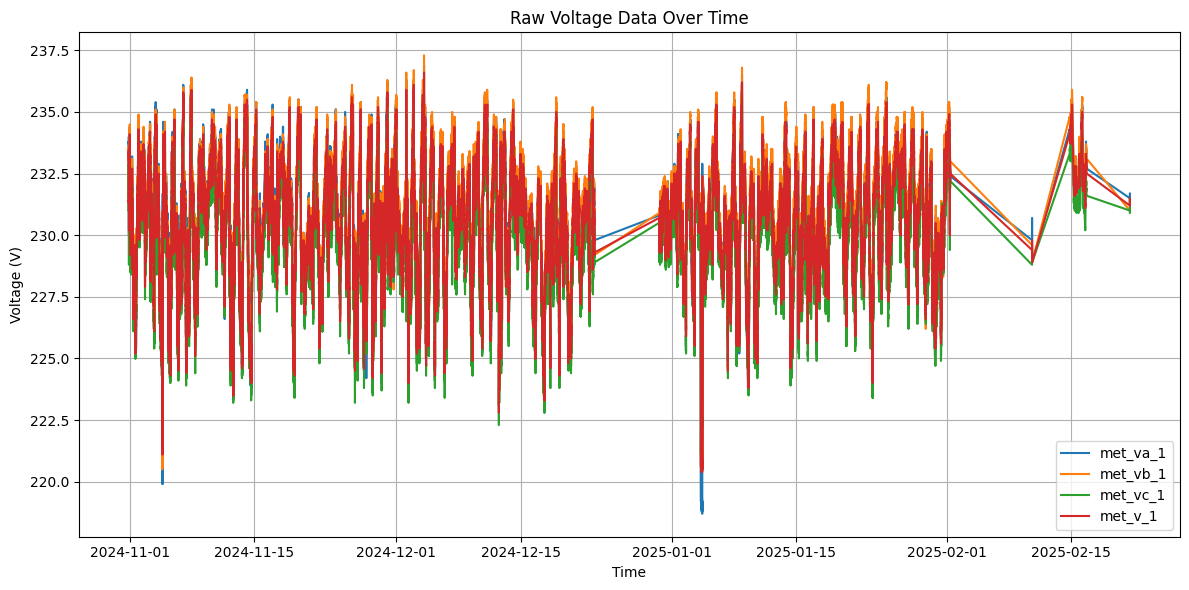

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


772/772 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.1640 - val_loss: 0.0181
Epoch 2/50
772/772 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0192 - val_loss: 0.0156
Epoch 3/50
772/772 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0147 - val_loss: 0.0155
Epoch 4/50
772/772 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0123 - val_loss: 0.0169
Epoch 5/50
772/772 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0103 - val_loss: 0.0146
Epoch 6/50
772/772 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0087 - val_loss: 0.0142
Epoch 7/50
772/772 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0082 - val_loss: 0.0117
Epoch 8/50
772/772 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0072 - val_loss: 0.0145
Epoch 9/50
772/772 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0073 - val_loss: 0.0111
Epoch 10/50
772/772 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0068 - val_loss: 0.0086
Epoch 11/50
772/772 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0070 - val_loss: 0.0114
Epoch 12/50
772/772 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.

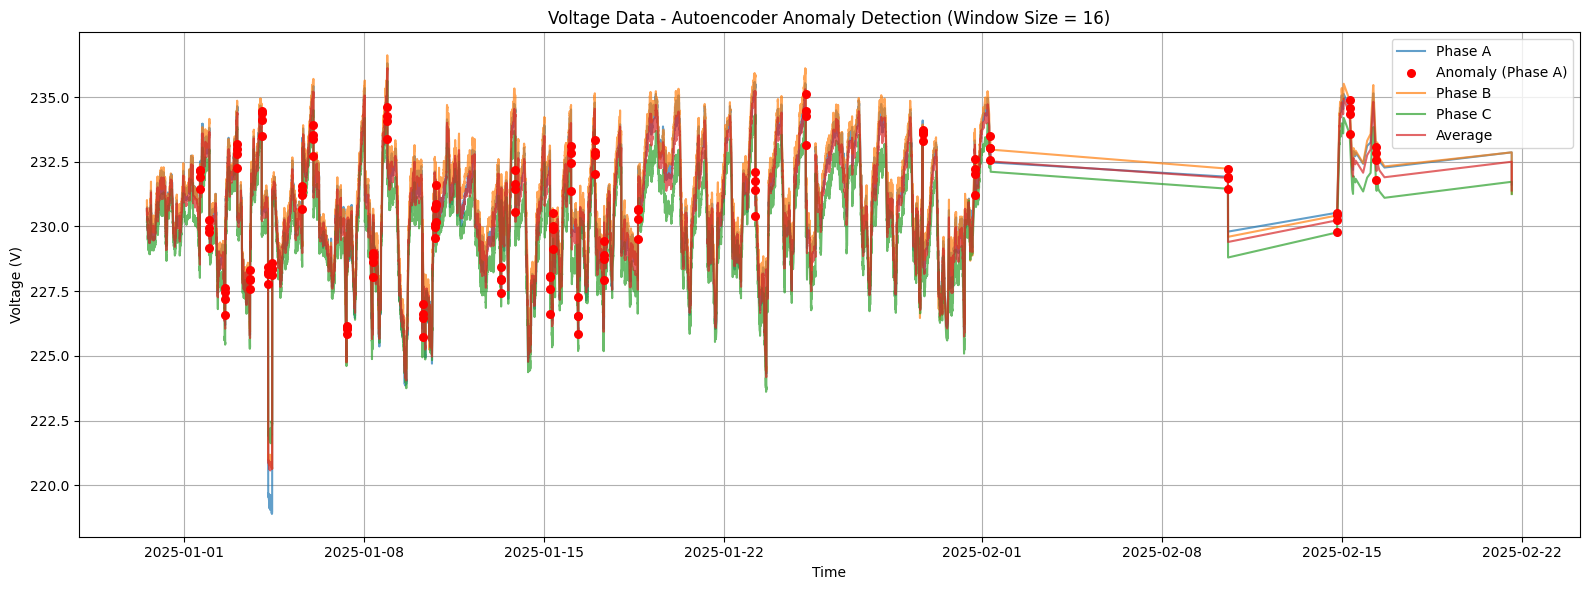

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Dropout, LeakyReLU
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Supervisor anomaly intervals
supervisor_anomalies_volt = [
    (pd.Timestamp('2025-01-04 06:40'), pd.Timestamp('2025-01-04 06:42')),
    (pd.Timestamp('2025-01-04 10:33'), pd.Timestamp('2025-01-04 10:35')),
    (pd.Timestamp('2025-02-10 13:39'), pd.Timestamp('2025-02-10 13:41')),
    (pd.Timestamp('2025-02-14 19:21'), pd.Timestamp('2025-02-14 19:23')),
    (pd.Timestamp('2025-02-14 21:30'), pd.Timestamp('2025-02-14 21:33')),
]

# Helper functions
def is_true_positive(ts, intervals):
    return any(start <= ts <= end for start, end in intervals)

def compare_anomalies(detected_indices, intervals):
    true_positives = [ts for ts in detected_indices if is_true_positive(ts, intervals)]
    false_positives = [ts for ts in detected_indices if not is_true_positive(ts, intervals)]
    false_negatives = [interval for interval in intervals if not any(is_true_positive(ts, [interval]) for ts in detected_indices)]
    return true_positives, false_positives, false_negatives

def window_dataframe_volt(df, window_size=12):
    n_rows = df.shape[0]
    n_windows = n_rows // window_size
    df_trunc = df.iloc[:n_windows * window_size]
    data = df_trunc.values.reshape(n_windows, window_size, df.shape[1])
    new_columns = []
    for col in df.columns:
        for i in range(window_size):
            base = col.replace('met_', '').replace('_1', '')
            new_columns.append(f"{base}-1-{i+1}")
    data_2d = data.transpose(0, 2, 1).reshape(n_windows, -1)
    return pd.DataFrame(data_2d, columns=new_columns)

# Plot raw voltage means
voltage_phases = ['met_va_1', 'met_vb_1', 'met_vc_1', 'met_v_1']
df_met1['data_hora'] = pd.to_datetime(df_met1['data_hora'])
df_met1 = df_met1.sort_values('data_hora')
plt.figure(figsize=(12, 6))
for phase in voltage_phases:
    plt.plot(df_met1['data_hora'], df_met1[phase], label=phase)
plt.title("Raw Voltage Data Over Time")
plt.xlabel("Time")
plt.ylabel("Voltage (V)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Best model and window selection (from previous summary)
best_window_volt = 16
best_model_volt = "Autoencoder"

# Prepare data
df_voltage_met1 = df_met1[['met_va_1', 'met_vb_1', 'met_vc_1', 'met_v_1']].copy()
df_voltage_met1_win = window_dataframe_volt(df_voltage_met1, window_size=best_window_volt)
df_voltage_met1_win_plot = df_voltage_met1_win.copy()
voltage_phases_clean = ['va', 'vb', 'vc', 'v']
for phase in voltage_phases_clean:
    cols = [f"{phase}-1-{i+1}" for i in range(best_window_volt)]
    df_voltage_met1_win_plot[f"{phase}_mean"] = df_voltage_met1_win_plot[cols].mean(axis=1)
timestamps_volt = df_met1['data_hora'].sort_values().values
n_windows_volt = len(df_voltage_met1_win_plot)
window_timestamps_volt = [timestamps_volt[(i+1)*best_window_volt - 1] for i in range(n_windows_volt)]
df_voltage_met1_win_plot['window_time'] = pd.to_datetime(window_timestamps_volt)
df_voltage_met1_win_plot = df_voltage_met1_win_plot.set_index('window_time')

# Train-test split
test_start_volt = pd.to_datetime('2024-12-29')
test_end_volt = pd.to_datetime('2025-02-23')
test_mask_volt = (df_voltage_met1_win_plot.index >= test_start_volt) & (df_voltage_met1_win_plot.index <= test_end_volt)
df_test_volt = df_voltage_met1_win_plot[test_mask_volt].copy()
df_train_volt = df_voltage_met1_win_plot[~test_mask_volt].copy()

X_train_volt = df_train_volt.drop(columns=[c for c in df_train_volt.columns if c.endswith('_mean')])
X_test_volt = df_test_volt.drop(columns=[c for c in df_test_volt.columns if c.endswith('_mean')])

# === Final Autoencoder ===
def build_final_autoencoder_volt(input_dim):
    model = Sequential()
    model.add(Dense(64, input_shape=(input_dim,), kernel_regularizer=regularizers.l2(1e-4)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.1))
    model.add(Dense(32, kernel_regularizer=regularizers.l2(1e-4)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(16, kernel_regularizer=regularizers.l2(1e-4)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(64))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(input_dim, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    return model

# === Final LSTM ===
def build_final_lstm_volt(seq_len, n_features):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(seq_len, n_features)),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),
        RepeatVector(seq_len),
        LSTM(32, return_sequences=True),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),
        LSTM(64, return_sequences=True),
        LeakyReLU(alpha=0.1),
        TimeDistributed(Dense(n_features))
    ])
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')
    return model

if best_model_volt == "Autoencoder":
    scaler_volt = StandardScaler()
    X_train_volt_scaled = scaler_volt.fit_transform(X_train_volt)
    X_test_volt_scaled = scaler_volt.transform(X_test_volt)
    model_volt = build_final_autoencoder_volt(X_train_volt_scaled.shape[1])
    model_volt.fit(X_train_volt_scaled, X_train_volt_scaled, epochs=50, batch_size=32, validation_split=0.1,
              callbacks=[EarlyStopping(patience=10, restore_best_weights=True)], verbose=1)
    recon_volt = model_volt.predict(X_test_volt_scaled)
    errors_volt = np.mean(np.square(X_test_volt_scaled - recon_volt), axis=1)
else:
    scaler_volt = MinMaxScaler()
    X_train_volt_scaled = scaler_volt.fit_transform(X_train_volt)
    X_test_volt_scaled = scaler_volt.transform(X_test_volt)
    n_features_volt = 4
    sequence_length_volt = best_window_volt
    X_train_seq_volt = X_train_volt_scaled.reshape(-1, sequence_length_volt, n_features_volt)
    X_test_seq_volt = X_test_volt_scaled.reshape(-1, sequence_length_volt, n_features_volt)
    model_volt = build_final_lstm_volt(sequence_length_volt, n_features_volt)
    model_volt.fit(X_train_seq_volt, X_train_seq_volt, epochs=50, batch_size=32, validation_split=0.1,
              callbacks=[EarlyStopping(patience=10, restore_best_weights=True)], verbose=1)
    recon_seq_volt = model_volt.predict(X_test_seq_volt)
    errors_volt = np.mean(np.square(X_test_seq_volt - recon_seq_volt), axis=(1, 2))

threshold_volt = np.percentile(errors_volt, 99.8)
anomalies_volt = errors_volt > threshold_volt
df_test_volt['anomaly_score'] = errors_volt
df_test_volt['predicted_label'] = anomalies_volt.astype(int)

# Plot final anomaly results
phase_labels_volt = ['Phase A', 'Phase B', 'Phase C', 'Average']
plt.figure(figsize=(16, 6))
for phase, label in zip(voltage_phases_clean, phase_labels_volt):
    plt.plot(df_test_volt.index, df_test_volt[f"{phase}_mean"], label=label, alpha=0.7)
    plt.scatter(
        df_test_volt.index[df_test_volt['predicted_label'] == 1],
        df_test_volt.loc[df_test_volt['predicted_label'] == 1, f"{phase}_mean"],
        color='red', s=30, zorder=10, label=f"Anomaly ({label})" if phase == voltage_phases_clean[0] else ""
    )
plt.title(f"Voltage Data - {best_model_volt} Anomaly Detection (Window Size = {best_window_volt})")
plt.xlabel("Time")
plt.ylabel("Voltage (V)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Compare to supervisor labels for voltage data
detected_voltage_anomalies = df_test_volt.index[df_test_volt['predicted_label'] == 1]
tp_volt, fp_volt, fn_volt = compare_anomalies(detected_voltage_anomalies, supervisor_anomalies_volt)

# Create and display summary
voltage_summary = pd.DataFrame({
    "Model": [best_model_volt],
    "Window Size": [best_window_volt],
    "Total Detected": [len(detected_voltage_anomalies)],
    "True Positives": [len(tp_volt)],
    "False Positives": [len(fp_volt)],
    "False Negatives": [len(fn_volt)],
})

print("\nVoltage Anomaly Detection Performance Summary:")
voltage_summary


Voltage Anomaly Detection Performance Summary:


,Model,Window Size,Total Detected,True Positives,False Positives,False Negatives
0,Autoencoder,16,34,3,31,2


In [ ]:
# Print detailed results
print("\nDetailed Results:")
print(f"Total anomalies detected: {len(detected_voltage_anomalies)}")
print(f"True positives: {len(tp_volt)}")
print(f"False positives: {len(fp_volt)}")
print(f"False negatives: {len(fn_volt)}")

# Print the actual timestamps of anomalies
print("\nDetected Voltage Anomaly Timestamps:")
print(detected_voltage_anomalies)

# Print supervisor's anomaly intervals that were missed (false negatives)
if len(fn_volt) > 0:
    print("\nMissed Voltage Anomaly Intervals (False Negatives):")
    for interval in fn_volt:
        print(f"From {interval[0]} to {interval[1]}")
else:
    print("\nNo missed voltage anomalies (all supervisor intervals detected)")


Detailed Results:
Total anomalies detected: 34
True positives: 3
False positives: 31
False negatives: 2

Detected Voltage Anomaly Timestamps:
DatetimeIndex(['2025-01-01 15:12:12', '2025-01-02 00:03:39',
               '2025-01-02 14:46:58', '2025-01-03 02:04:00',
               '2025-01-03 13:57:19', '2025-01-04 00:46:33',
               '2025-01-04 06:41:13', '2025-01-04 10:35:13',
               '2025-01-05 14:42:05', '2025-01-06 01:02:40',
               '2025-01-07 07:57:29', '2025-01-08 08:06:52',
               '2025-01-08 21:58:15', '2025-01-10 06:43:06',
               '2025-01-10 18:18:02', '2025-01-10 19:10:34',
               '2025-01-13 08:05:51', '2025-01-13 21:19:51',
               '2025-01-15 05:44:32', '2025-01-15 07:59:33',
               '2025-01-16 01:15:26', '2025-01-16 07:57:28',
               '2025-01-16 23:26:39', '2025-01-17 07:58:40',
               '2025-01-18 15:37:05', '2025-01-23 05:06:24',
               '2025-01-25 03:57:46', '2025-01-29 17:05:57',
   

#### **saving the model**

In [ ]:
from google.colab import drive
from joblib import dump
from tensorflow.keras.models import load_model
from tensorflow.keras.models import save_model
import os
from joblib import load

In [ ]:
# === Step 1: Mount Drive ===
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# === Step 2: Define project directory ===
# Define root directory
base_dir = "/content/drive/MyDrive/anomaly_detection_project"


In [ ]:
subset_dirs = {
    "meter1_voltage": os.path.join(base_dir, "meter1_voltage"),
    "meter1_current": os.path.join(base_dir, "meter1_current"),
    "meter1_powerfactor": os.path.join(base_dir, "meter1_powerfactor"),
    "meter1_sequence": os.path.join(base_dir, "meter1_sequence"),
    "meter2_voltage": os.path.join(base_dir, "meter2_voltage"),
    "meter2_current": os.path.join(base_dir, "meter2_current")
}
# Create all directories
for dir_path in subset_dirs.values():
    os.makedirs(dir_path, exist_ok=True)

In [ ]:
# Save model and scaler
save_model(model_volt, os.path.join(subset_dirs["meter1_voltage"], "autoencoder_model.keras"))
dump(scaler_volt, os.path.join(subset_dirs["meter1_voltage"], "scaler.pkl"))

# (Optional) Save evaluation summary
voltage_summary.to_csv(os.path.join(subset_dirs["meter1_voltage"], "summary.csv"), index=False)


In [ ]:
# Base path where models are stored
base_dir = "/content/drive/MyDrive/anomaly_detection_project"

# Choose the subset you want to load
subset = "meter1_voltage"  # Change this to the subset you're testing

# Build full paths
model_path = os.path.join(base_dir, subset, "autoencoder_model.keras")
scaler_path = os.path.join(base_dir, subset, "scaler.pkl")

from tensorflow.keras.models import load_model
from joblib import load

# Load trained model
model = load_model(model_path)

# Load scaler
scaler = load(scaler_path)

print("✅ Model and scaler loaded successfully!")


✅ Model and scaler loaded successfully!


## Meter 1 - Current Data



In [ ]:
# Extract current data from original dataset with timestamps
df_met1_i_original = df_met1[['data_hora', 'met_ia_1', 'met_ib_1', 'met_ic_1', 'met_i_1', 'met_in_1']].copy()

# Ensure the timestamp is in datetime format
df_met1_i_original['data_hora'] = pd.to_datetime(df_met1_i_original['data_hora'])

In [ ]:
df_met1_i_original.head()

,data_hora,met_ia_1,met_ib_1,met_ic_1,met_i_1,met_in_1
0,2024-10-31 20:31:19,22.25,11.68,10.36,14.76,17.63
1,2024-10-31 20:31:29,22.35,11.78,10.47,14.87,17.65
2,2024-10-31 20:31:39,22.31,11.64,10.32,14.76,17.71
3,2024-10-31 20:31:49,22.37,11.67,10.36,14.80,17.72
4,2024-10-31 20:32:00,22.23,11.59,10.26,14.70,17.71


In [ ]:
df_met1_i_original.shape

(704248, 6)

In [ ]:
#  Specify the file path (adjust this to your file's location)
file_path_current_1 = '/content/drive/MyDrive/PowerAI_dataset/met_1_i.csv'  # Change this to your actual file path

# Read the CSV file using pandas
try:
    df_current_1 = pd.read_csv(file_path_current_1)
    print("File loaded successfully!")
    # Display the first few rows
    print("\nFirst 5 rows of the dataframe:")
    print(df_current_1.head())
except FileNotFoundError:
    print(f"File not found at path: {file_path_current_1}")
except Exception as e:
    print(f"An error occurred: {str(e)}")

File loaded successfully!

First 5 rows of the dataframe:
                        time   m1_ia   m1_ib  m1_ic     m1_i  m1_in
0  2025-02-01 00:00:00+00:00  24.180  10.980  9.595  14.9200  20.08
1  2025-02-01 00:00:20+00:00  24.215  10.955  9.570  14.9150  20.15
2  2025-02-01 00:00:40+00:00  24.170  10.940  9.510  14.8725  20.14
3  2025-02-01 00:01:00+00:00  24.050  10.910  9.520  14.8300  20.10
4  2025-02-01 00:01:20+00:00  24.230  11.030  9.670  14.9750  20.12


In [ ]:
# Rename columns and convert timestamp
df_current_1 = df_current_1.rename(columns={
    'm1_ia': 'met_ia_1',
    'm1_ib': 'met_ib_1',
    'm1_ic': 'met_ic_1',
    'm1_i': 'met_i_1',
    'm1_in': 'met_in_1',
    'time': 'data_hora'
})

# Convert to datetime and ensure consistent timezone (remove +00:00 if present)
df_current_1['data_hora'] = pd.to_datetime(df_current_1['data_hora']).dt.tz_localize(None)

In [ ]:
df_current_1.head()

,data_hora,met_ia_1,met_ib_1,met_ic_1,met_i_1,met_in_1
0,2025-02-01 00:00:00,24.180,10.980,9.595,14.9200,20.08
1,2025-02-01 00:00:20,24.215,10.955,9.570,14.9150,20.15
2,2025-02-01 00:00:40,24.170,10.940,9.510,14.8725,20.14
3,2025-02-01 00:01:00,24.050,10.910,9.520,14.8300,20.10
4,2025-02-01 00:01:20,24.230,11.030,9.670,14.9750,20.12


In [ ]:
df_current_1.shape

(612605, 6)

In [ ]:
# Combine both datasets
df_combined_current = pd.concat([df_met1_i_original, df_current_1])

# Sort by timestamp
df_combined_current = df_combined_current.sort_values('data_hora').reset_index(drop=True)

# Check for duplicates and remove them
df_combined_current = df_combined_current.drop_duplicates(subset='data_hora', keep='first')

In [ ]:
df_combined_current.shape

(1316789, 6)

In [ ]:
df_combined_current.head()

,data_hora,met_ia_1,met_ib_1,met_ic_1,met_i_1,met_in_1
0,2024-10-31 20:31:19,22.25,11.68,10.36,14.76,17.63
1,2024-10-31 20:31:29,22.35,11.78,10.47,14.87,17.65
2,2024-10-31 20:31:39,22.31,11.64,10.32,14.76,17.71
3,2024-10-31 20:31:49,22.37,11.67,10.36,14.80,17.72
4,2024-10-31 20:32:00,22.23,11.59,10.26,14.70,17.71


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Dropout, LeakyReLU
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# === Supervisor anomaly intervals
supervisor_anomalies_current = [
    (pd.Timestamp('2025-01-04 06:40'), pd.Timestamp('2025-01-04 06:42')),
    (pd.Timestamp('2025-01-04 06:42'), pd.Timestamp('2025-01-04 06:44')),
    (pd.Timestamp('2025-01-04 10:33'), pd.Timestamp('2025-01-04 10:36')),
    (pd.Timestamp('2025-01-09 11:27'), pd.Timestamp('2025-01-09 11:40')),
    (pd.Timestamp('2025-01-22 01:42'), pd.Timestamp('2025-01-22 01:44')),
    (pd.Timestamp('2025-01-22 06:51'), pd.Timestamp('2025-01-22 06:53')),
    (pd.Timestamp('2025-01-29 13:51'), pd.Timestamp('2025-01-29 13:54')),
    (pd.Timestamp('2025-01-29 13:55'), pd.Timestamp('2025-01-29 13:57')),
    (pd.Timestamp('2025-01-29 14:25'), pd.Timestamp('2025-01-29 14:28')),
    (pd.Timestamp('2025-01-29 14:29'), pd.Timestamp('2025-01-29 14:33')),
    (pd.Timestamp('2025-02-10 13:47'), pd.Timestamp('2025-02-10 13:48')),
    (pd.Timestamp('2025-02-14 19:21'), pd.Timestamp('2025-02-14 19:30'))
]

In [ ]:
def window_dataframe(df, window_size):
    """Enhanced windowing function that preserves timestamps"""
    # Get features (excluding timestamp)
    features = df.drop(columns=['data_hora']).values
    n_rows = features.shape[0]
    n_windows = n_rows // window_size

    # Window the features
    windowed_features = features[:n_windows * window_size].reshape(n_windows, window_size, -1)

    # Get the last timestamp of each window
    window_timestamps = df['data_hora'].iloc[(window_size-1)::window_size].values[:n_windows]

    # Create column names
    new_columns = []
    for col in df.columns:
        if col != 'data_hora':
            base = col.replace('met_', '').replace('_1', '')
            new_columns += [f"{base}-1-{i+1}" for i in range(window_size)]

    # Reshape data
    windowed_data = windowed_features.transpose(0, 2, 1).reshape(n_windows, -1)
    windowed_df = pd.DataFrame(windowed_data, columns=new_columns)

    # Add timestamps
    windowed_df['window_time'] = pd.to_datetime(window_timestamps)

    return windowed_df.set_index('window_time')

In [ ]:
from typing import List, Tuple
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Dropout, LeakyReLU
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

# === Enhanced Utility Functions ===

def is_true_positive(ts: pd.Timestamp, intervals: List[Tuple[pd.Timestamp, pd.Timestamp]]) -> bool:
    """Check if a timestamp falls within any anomaly interval."""
    return any(start <= ts <= end for start, end in intervals)

def compare_anomalies_with_metrics(
    detected_indices: List[pd.Timestamp],
    intervals: List[Tuple[pd.Timestamp, pd.Timestamp]],
    all_timestamps: List[pd.Timestamp]
) -> Tuple[float, float, float]:
    """
    Calculate precision, recall, and F1-score for anomaly detection.

    Args:
        detected_indices: List of timestamps where anomalies were detected
        intervals: List of supervisor-labeled anomaly intervals (start, end)
        all_timestamps: All timestamps in the test set

    Returns:
        Tuple of (precision, recall, f1)
    """
    # Create binary vectors for true and predicted anomalies
    y_true = np.array([1 if is_true_positive(ts, intervals) else 0 for ts in all_timestamps])
    y_pred = np.array([1 if ts in detected_indices else 0 for ts in all_timestamps])

    # Calculate metrics
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    return precision, recall, f1

def window_dataframe(
    df: pd.DataFrame,
    window_size: int,
    timestamp_col: str = 'data_hora'
) -> pd.DataFrame:
    """
    Convert time series data into windowed format while preserving timestamps.

    Args:
        df: Input DataFrame with time series data
        window_size: Number of time steps per window
        timestamp_col: Name of the timestamp column

    Returns:
        Windowed DataFrame with multi-time-step features
    """
    # Get features (excluding timestamp)
    features = df.drop(columns=[timestamp_col]).values
    n_rows = features.shape[0]
    n_windows = n_rows // window_size

    # Window the features
    windowed_features = features[:n_windows * window_size].reshape(n_windows, window_size, -1)

    # Get the last timestamp of each window
    window_timestamps = df[timestamp_col].iloc[(window_size-1)::window_size].values[:n_windows]

    # Create column names
    new_columns = []
    for col in df.columns:
        if col != timestamp_col:
            base = col.replace('met_', '').replace('_1', '')
            new_columns += [f"{base}-1-{i+1}" for i in range(window_size)]

    # Reshape data and create DataFrame
    windowed_data = windowed_features.transpose(0, 2, 1).reshape(n_windows, -1)
    windowed_df = pd.DataFrame(windowed_data, columns=new_columns)

    # Add timestamps as index
    windowed_df['window_time'] = pd.to_datetime(window_timestamps)
    windowed_df = windowed_df.set_index('window_time')

    return windowed_df

def build_autoencoder(
    input_dim: int,
    hidden_dims: List[int] = [64, 32, 16],
    l2_reg: float = 1e-4,
    dropout_rate: float = 0.1,
    leaky_alpha: float = 0.1
) -> Sequential:
    """
    Build a symmetric autoencoder model with configurable architecture.

    Args:
        input_dim: Dimension of input features
        hidden_dims: List of hidden layer dimensions (encoder part)
        l2_reg: L2 regularization factor
        dropout_rate: Dropout rate
        leaky_alpha: Alpha parameter for LeakyReLU

    Returns:
        Compiled autoencoder model
    """
    model = Sequential()

    # Encoder
    for dim in hidden_dims:
        model.add(Dense(dim, kernel_regularizer=regularizers.l2(l2_reg)))
        model.add(LeakyReLU(alpha=leaky_alpha))
        model.add(Dropout(dropout_rate))

    # Decoder (symmetric to encoder)
    for dim in reversed(hidden_dims[:-1]):
        model.add(Dense(dim))
        model.add(LeakyReLU(alpha=leaky_alpha))

    # Final output layer
    model.add(Dense(input_dim, activation='linear'))

    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')
    return model

def build_lstm_autoencoder(
    seq_len: int,
    n_features: int,
    encoder_dims: List[int] = [64, 32],
    decoder_dims: List[int] = [32, 64],
    dropout_rate: float = 0.2,
    leaky_alpha: float = 0.1
) -> Sequential:
    """
    Build an LSTM autoencoder model with configurable architecture.

    Args:
        seq_len: Length of input sequences
        n_features: Number of features per time step
        encoder_dims: List of encoder LSTM units
        decoder_dims: List of decoder LSTM units
        dropout_rate: Dropout rate
        leaky_alpha: Alpha parameter for LeakyReLU

    Returns:
        Compiled LSTM autoencoder model
    """
    model = Sequential()

    # Encoder
    for i, units in enumerate(encoder_dims):
        return_sequences = i < len(encoder_dims) - 1  # Only last encoder layer doesn't return sequences
        model.add(LSTM(units, return_sequences=return_sequences,
                      input_shape=(seq_len, n_features) if i == 0 else None))
        model.add(LeakyReLU(alpha=leaky_alpha))
        model.add(Dropout(dropout_rate))

    # Repeat vector
    model.add(RepeatVector(seq_len))

    # Decoder
    for units in decoder_dims:
        model.add(LSTM(units, return_sequences=True))
        model.add(LeakyReLU(alpha=leaky_alpha))
        model.add(Dropout(dropout_rate))

    # Output layer
    model.add(TimeDistributed(Dense(n_features)))

    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')
    return model

In [ ]:
# === Main Training Loop ===
results_current = []
window_sizes = [12, 16,25]
current_cols = ['met_ia_1', 'met_ib_1', 'met_ic_1', 'met_i_1', 'met_in_1']

for window_size in window_sizes:
    # Create windowed dataset
    df_win = window_dataframe(df_combined_current[current_cols + ['data_hora']].copy(), window_size)

    # Train/test split
    test_mask = (df_win.index >= "2024-12-29") & (df_win.index <= "2025-02-23")
    df_test = df_win[test_mask]
    df_train = df_win[~test_mask]

    X_train = df_train.copy()
    X_test = df_test.copy()
    all_ts = df_test.index  # All timestamps in test set

    # === Autoencoder ===
    scaler_ae = StandardScaler()
    X_train_ae = scaler_ae.fit_transform(X_train)
    X_test_ae = scaler_ae.transform(X_test)

    ae_model = build_autoencoder(X_train_ae.shape[1])
    ae_model.fit(X_train_ae, X_train_ae, epochs=30, batch_size=32, validation_split=0.1,
                callbacks=[EarlyStopping(patience=5, restore_best_weights=True)], verbose=0)

    ae_recon = ae_model.predict(X_test_ae)
    ae_err = np.mean((X_test_ae - ae_recon)**2, axis=1)
    ae_thresh = np.percentile(ae_err, 99.8)
    ae_anomalies = all_ts[ae_err > ae_thresh]
    p_ae, r_ae, f_ae = compare_anomalies_with_metrics(ae_anomalies, supervisor_anomalies_current, all_ts)

    results_current.append({
        "Model": "Autoencoder", "Window Size": window_size,
        "Threshold": ae_thresh, "Total Detected": len(ae_anomalies),
        "Precision": p_ae, "Recall": r_ae, "F1-score": f_ae
    })

    # === LSTM ===
    scaler_lstm = MinMaxScaler()
    X_train_lstm = scaler_lstm.fit_transform(X_train)
    X_test_lstm = scaler_lstm.transform(X_test)
    X_train_seq = X_train_lstm.reshape(-1, window_size, 5)  # 5 current features
    X_test_seq = X_test_lstm.reshape(-1, window_size, 5)

    lstm_model = build_lstm_autoencoder(window_size, 5)
    lstm_model.fit(X_train_seq, X_train_seq, epochs=30, batch_size=32, validation_split=0.1,
                  callbacks=[EarlyStopping(patience=5, restore_best_weights=True)], verbose=0)

    lstm_recon = lstm_model.predict(X_test_seq)
    lstm_err = np.mean((X_test_seq - lstm_recon)**2, axis=(1, 2))
    lstm_thresh = np.percentile(lstm_err, 99.8)
    lstm_anomalies = all_ts[lstm_err > lstm_thresh]
    p_lstm, r_lstm, f_lstm = compare_anomalies_with_metrics(lstm_anomalies, supervisor_anomalies_current, all_ts)

    results_current.append({
        "Model": "LSTM", "Window Size": window_size,
        "Threshold": lstm_thresh, "Total Detected": len(lstm_anomalies),
        "Precision": p_lstm, "Recall": r_lstm, "F1-score": f_lstm
    })

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


939/939 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


939/939 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


451/451 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


In [ ]:
# Convert results to DataFrame
results_df = pd.DataFrame(results_current)

# Find best model based on F1 score
best_model = results_df.loc[results_df['F1-score'].idxmax()]

print("Best Performing Model:")
print(best_model)

# Display all results
print("\nComplete Results:")
display(results_df.sort_values(['Model', 'Window Size']))

Best Performing Model:
Model             Autoencoder
Window Size                25
Threshold            0.100842
Total Detected             29
Precision            0.241379
Recall               0.583333
F1-score             0.341463
Name: 4, dtype: object

Complete Results:


,Model,Window Size,Threshold,Total Detected,Precision,Recall,F1-score
0,Autoencoder,12,0.090693,61,0.131148,0.400000,0.197531
2,Autoencoder,16,0.083368,46,0.173913,0.444444,0.250000
4,Autoencoder,25,0.100842,29,0.241379,0.583333,0.341463
1,LSTM,12,0.015720,61,0.081967,0.250000,0.123457
3,LSTM,16,0.015135,46,0.130435,0.333333,0.187500
5,LSTM,25,0.015310,29,0.137931,0.333333,0.195122


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.4481 - val_loss: 1.1277
Epoch 2/50
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0523 - val_loss: 0.8204
Epoch 3/50
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0394 - val_loss: 0.6557
Epoch 4/50
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0336 - val_loss: 0.5332
Epoch 5/50
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0306 - val_loss: 0.4644
Epoch 6/50
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0284 - val_loss: 0.4126
Epoch 7/50
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0252 - val_loss: 0.3467
Epoch 8/50
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0242 - val_loss: 0.3292
Epoch 9/50
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0223 - val_loss: 0.3102
Epoch 10/50
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0208 - val_loss: 0.2933
Epoch 11/50
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0186 - val_loss: 0.2707
Epoch 12/50
1077/1077 ━━━━━━━

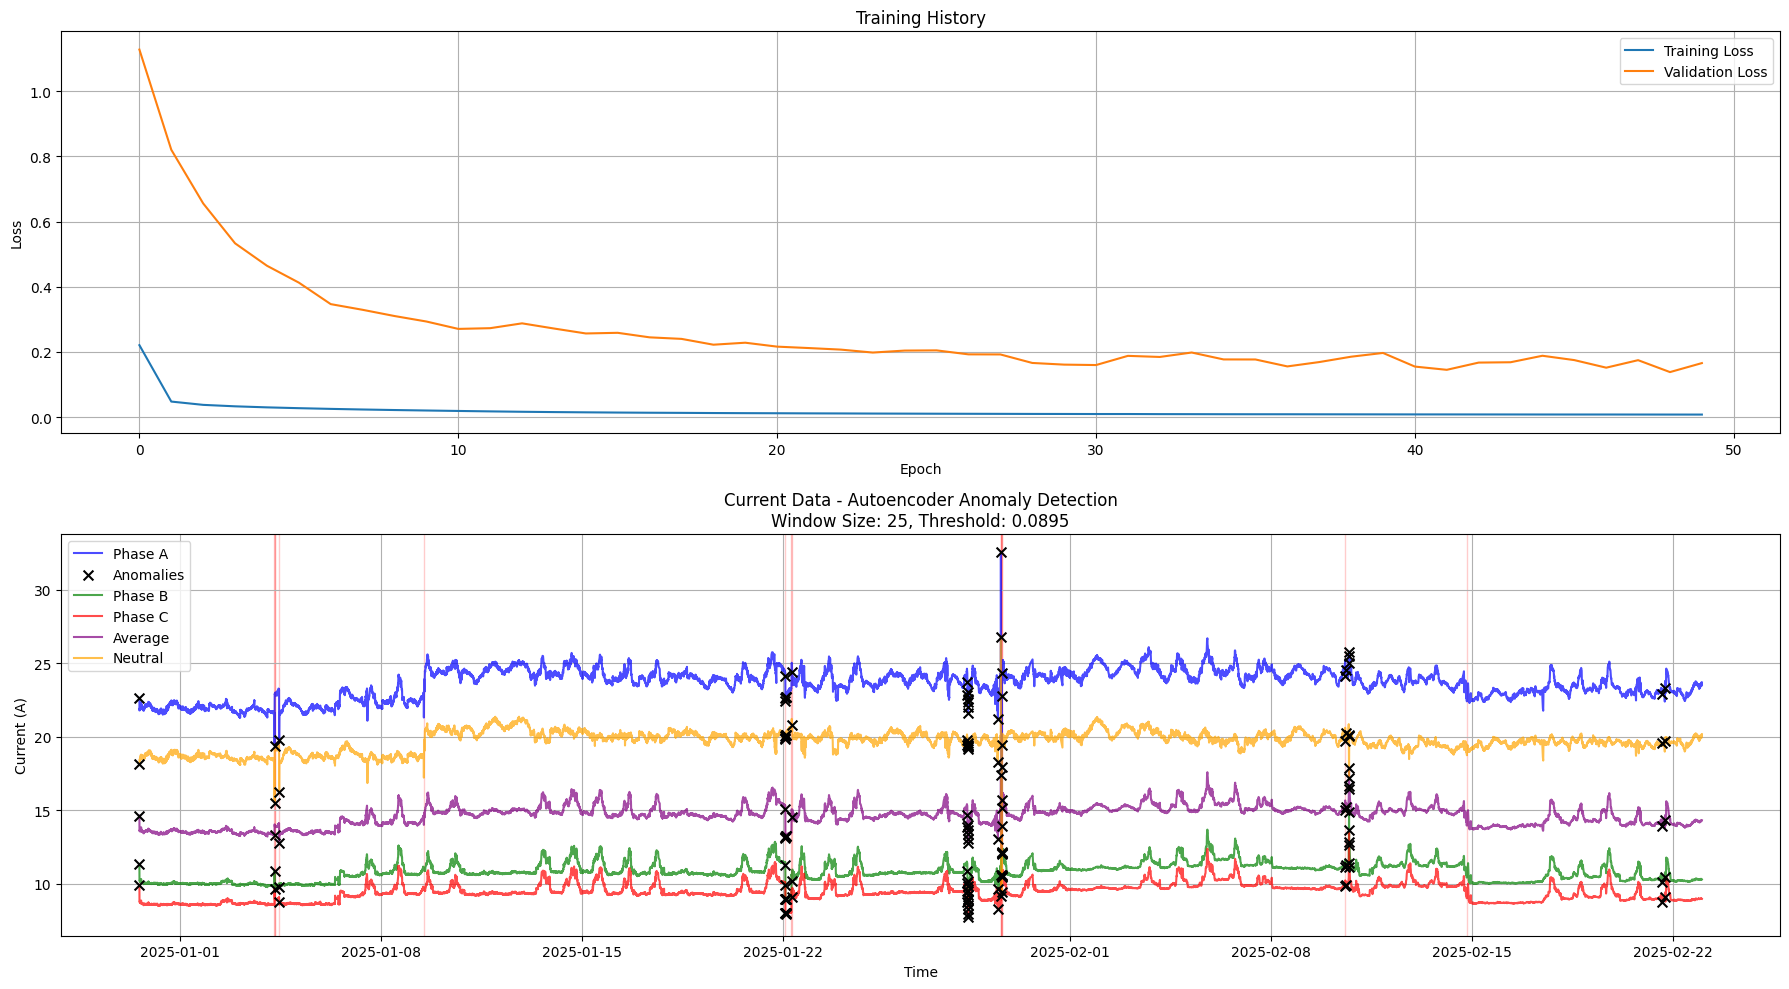


Final Model Performance:
- Precision: 0.2414
- Recall: 0.5833
- F1-score: 0.3415
- Threshold: 0.0895
- Anomalies Detected: 29


In [ ]:
# After running your model selection code that produces results_df
best_model_info = results_df.loc[results_df['F1-score'].idxmax()]
best_window_current = best_model_info['Window Size']
best_model_current = best_model_info['Model']

# Prepare windowed data from COMBINED dataset
df_current_met1 = df_combined_current[current_cols].copy()
df_current_met1_win = window_dataframe(df_combined_current[current_cols + ['data_hora']], window_size=best_window_current)
df_current_met1_win_plot = df_current_met1_win.copy()

# Calculate window means
current_phases_clean = ['ia', 'ib', 'ic', 'i', 'in']
for phase in current_phases_clean:
    cols = [f"{phase}-1-{i+1}" for i in range(best_window_current)]
    df_current_met1_win_plot[f"{phase}_mean"] = df_current_met1_win_plot[cols].mean(axis=1)

# Train-test split (using same dates as before)
test_start_current = pd.to_datetime('2024-12-29')
test_end_current = pd.to_datetime('2025-02-23')
test_mask_current = (df_current_met1_win_plot.index >= test_start_current) & (df_current_met1_win_plot.index <= test_end_current)
df_test_current = df_current_met1_win_plot[test_mask_current].copy()
df_train_current = df_current_met1_win_plot[~test_mask_current].copy()

# Prepare features (exclude mean columns)
X_train_current = df_train_current.drop(columns=[c for c in df_train_current.columns if c.endswith('_mean')])
X_test_current = df_test_current.drop(columns=[c for c in df_test_current.columns if c.endswith('_mean')])

# === Enhanced Model Building ===
def build_enhanced_autoencoder(input_dim):
    model = Sequential([
        Dense(128, input_shape=(input_dim,), kernel_regularizer=regularizers.l2(1e-4)),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),
        Dense(64, kernel_regularizer=regularizers.l2(1e-4)),
        LeakyReLU(alpha=0.1),
        Dense(32, kernel_regularizer=regularizers.l2(1e-4)),
        LeakyReLU(alpha=0.1),
        Dense(16, kernel_regularizer=regularizers.l2(1e-4)),
        LeakyReLU(alpha=0.1),
        Dense(32),
        LeakyReLU(alpha=0.1),
        Dense(64),
        LeakyReLU(alpha=0.1),
        Dense(input_dim, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')
    return model

def build_enhanced_lstm(seq_len, n_features):
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=(seq_len, n_features)),
        LeakyReLU(alpha=0.1),
        Dropout(0.3),
        LSTM(64, return_sequences=True),
        LeakyReLU(alpha=0.1),
        Dropout(0.3),
        LSTM(32, return_sequences=False),
        LeakyReLU(alpha=0.1),
        Dropout(0.3),
        RepeatVector(seq_len),
        LSTM(32, return_sequences=True),
        LeakyReLU(alpha=0.1),
        Dropout(0.3),
        LSTM(64, return_sequences=True),
        LeakyReLU(alpha=0.1),
        Dropout(0.3),
        LSTM(128, return_sequences=True),
        LeakyReLU(alpha=0.1),
        TimeDistributed(Dense(n_features))
    ])
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')
    return model

# === Train Best Model ===
if best_model_current == "Autoencoder":
    scaler_current = StandardScaler()
    X_train_current_scaled = scaler_current.fit_transform(X_train_current)
    X_test_current_scaled = scaler_current.transform(X_test_current)

    model_current = build_enhanced_autoencoder(X_train_current_scaled.shape[1])
    history = model_current.fit(
        X_train_current_scaled, X_train_current_scaled,
        epochs=50, batch_size=32, validation_split=0.1,
        callbacks=[EarlyStopping(patience=10, restore_best_weights=True)],
        verbose=1
    )

    recon_current = model_current.predict(X_test_current_scaled)
    errors_current = np.mean(np.square(X_test_current_scaled - recon_current), axis=1)

else:  # LSTM
    scaler_current = MinMaxScaler()
    X_train_current_scaled = scaler_current.fit_transform(X_train_current)
    X_test_current_scaled = scaler_current.transform(X_test_current)

    n_features_current = 5  # ia, ib, ic, i, in
    X_train_current_seq = X_train_current_scaled.reshape(-1, best_window_current, n_features_current)
    X_test_current_seq = X_test_current_scaled.reshape(-1, best_window_current, n_features_current)

    model_current = build_enhanced_lstm(best_window_current, n_features_current)
    history = model_current.fit(
        X_train_current_seq, X_train_current_seq,
        epochs=50, batch_size=32, validation_split=0.1,
        callbacks=[EarlyStopping(patience=10, restore_best_weights=True)],
        verbose=1
    )

    recon_seq_current = model_current.predict(X_test_current_seq)
    errors_current = np.mean(np.square(X_test_current_seq - recon_seq_current), axis=(1, 2))

# Dynamic threshold selection
threshold_current = np.percentile(errors_current, 99.8)
anomalies_current = errors_current > threshold_current

# Add results to test dataframe
df_test_current['anomaly_score'] = errors_current
df_test_current['predicted_label'] = anomalies_current.astype(int)

# === Visualization ===
plt.figure(figsize=(18, 10))

# Plot training history if available
if 'history' in locals():
    plt.subplot(2, 1, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training History')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid(True)

# Plot anomaly detection results
ax = plt.subplot(2, 1, 2) if 'history' in locals() else plt.subplot(1, 1, 1)

current_labels = ['Phase A', 'Phase B', 'Phase C', 'Average', 'Neutral']
colors = ['blue', 'green', 'red', 'purple', 'orange']

for phase, label, color in zip(current_phases_clean, current_labels, colors):
    ax.plot(df_test_current.index, df_test_current[f"{phase}_mean"],
            label=label, alpha=0.7, color=color)

    # Plot anomalies
    anomalies = df_test_current[df_test_current['predicted_label'] == 1]
    ax.scatter(
        anomalies.index,
        anomalies[f"{phase}_mean"],
        color='black', marker='x', s=50, zorder=10,
        label='Anomalies' if phase == current_phases_clean[0] else ""
    )

# Highlight supervisor-labeled anomalies
for interval in supervisor_anomalies_current:
    ax.axvspan(interval[0], interval[1], color='red', alpha=0.2)

ax.set_title(f"Current Data - {best_model_current} Anomaly Detection\nWindow Size: {best_window_current}, Threshold: {threshold_current:.4f}")
ax.set_xlabel("Time")
ax.set_ylabel("Current (A)")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

# === Performance Metrics ===
detected_anomalies = df_test_current.index[df_test_current['predicted_label'] == 1]
p, r, f1 = compare_anomalies_with_metrics(detected_anomalies, supervisor_anomalies_current, df_test_current.index)

print("\nFinal Model Performance:")
print(f"- Precision: {p:.4f}")
print(f"- Recall: {r:.4f}")
print(f"- F1-score: {f1:.4f}")
print(f"- Threshold: {threshold_current:.4f}")
print(f"- Anomalies Detected: {len(detected_anomalies)}")

In [ ]:
# Compare to supervisor labels
predicted_anomaly_indices_current = df_test_current.index[df_test_current['predicted_label'] == 1]
tp_current, fp_current, fn_current = compare_anomalies(predicted_anomaly_indices_current, supervisor_anomalies_current)

# Create and display summary
summary_current = pd.DataFrame({
    "Model": [best_model_current],
    "Window Size": [best_window_current],
    "Total Detected": [len(predicted_anomaly_indices_current)],
    "True Positives": [len(tp_current)],
    "False Positives": [len(fp_current)],
    "False Negatives": [len(fn_current)],
})

print("\nAnomaly Detection Performance Summary (Current Data):")
summary_current


Anomaly Detection Performance Summary (Current Data):


,Model,Window Size,Total Detected,True Positives,False Positives,False Negatives
0,Autoencoder,25,29,7,22,5


In [ ]:
# Print detailed results
print("\nDetailed Results (Current Data):")
print(f"Total anomalies detected: {len(predicted_anomaly_indices_current)}")
print(f"True positives: {len(tp_current)}")
print(f"False positives: {len(fp_current)}")
print(f"False negatives: {len(fn_current)}")

# Print the actual timestamps of anomalies
print("\nDetected Anomaly Timestamps (Current Data):")
print(predicted_anomaly_indices_current)

# Print supervisor's anomaly intervals that were missed (false negatives)
if len(fn_current) > 0:
    print("\nMissed Anomaly Intervals (False Negatives - Current Data):")
    for interval in fn_current:
        print(f"From {interval[0]} to {interval[1]}")
else:
    print("\nNo missed anomalies (all supervisor intervals detected)")


Detailed Results (Current Data):
Total anomalies detected: 29
True positives: 7
False positives: 22
False negatives: 5

Detected Anomaly Timestamps (Current Data):
DatetimeIndex(['2024-12-30 13:45:26', '2025-01-04 06:42:56',
               '2025-01-04 10:35:13', '2025-01-22 01:42:43',
               '2025-01-22 01:47:01', '2025-01-22 01:51:18',
               '2025-01-22 01:55:36', '2025-01-22 01:59:53',
               '2025-01-22 02:12:52', '2025-01-22 06:52:53',
               '2025-01-28 09:55:25', '2025-01-28 09:59:42',
               '2025-01-28 10:04:10', '2025-01-28 10:08:27',
               '2025-01-28 10:17:02', '2025-01-28 10:21:19',
               '2025-01-28 10:25:37', '2025-01-29 11:24:43',
               '2025-01-29 13:55:17', '2025-01-29 14:26:32',
               '2025-01-29 14:30:50', '2025-01-29 14:35:08',
               '2025-02-10 13:48:40', '2025-02-10 14:04:00',
               '2025-02-10 16:57:40', '2025-02-10 17:06:00',
               '2025-02-10 17:14:20', '202

#### **saving the model**

In [ ]:
from google.colab import drive
from joblib import dump
from tensorflow.keras.models import load_model
from tensorflow.keras.models import save_model
import os
from joblib import load

# === Step 1: Mount Drive ===
# from google.colab import drive
# drive.mount('/content/drive')

 # Save model and scaler
save_model(model_current, os.path.join(subset_dirs["meter1_current"], "autoencoder_model.keras"))
dump(scaler_current, os.path.join(subset_dirs["meter1_current"], "scaler.pkl"))


# (Optional) Save evaluation summary
voltage_summary.to_csv(os.path.join(subset_dirs["meter1_current"], "summary.csv"), index=False)

In [ ]:
# Base path where models are stored
base_dir = "/content/drive/MyDrive/anomaly_detection_project"

# Choose the subset you want to load
subset = "meter1_current"  # Change this to the subset you're testing

# Build full paths
model_path = os.path.join(base_dir, subset, "autoencoder_model.keras")
scaler_path = os.path.join(base_dir, subset, "scaler.pkl")

from tensorflow.keras.models import load_model
from joblib import load

# Load trained model
model = load_model(model_path)

# Load scaler
scaler = load(scaler_path)

print("✅ Model and scaler loaded successfully!")

✅ Model and scaler loaded successfully!


## Meter 1 - Power Factor Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Dropout, LeakyReLU
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Supervisor anomaly intervals for power factor data
supervisor_anomalies_fp = [
    (pd.Timestamp('2025-01-04 06:40'), pd.Timestamp('2025-01-04 06:42')),
    (pd.Timestamp('2025-01-04 06:42'), pd.Timestamp('2025-01-04 06:44')),
    (pd.Timestamp('2025-01-04 10:33'), pd.Timestamp('2025-01-04 10:35')),
    (pd.Timestamp('2025-01-22 01:42'), pd.Timestamp('2025-01-22 01:44')),
    (pd.Timestamp('2025-01-28 09:53'), pd.Timestamp('2025-01-28 09:54')),
    (pd.Timestamp('2025-01-28 09:55'), pd.Timestamp('2025-01-28 09:56')),
    (pd.Timestamp('2025-01-28 10:04'), pd.Timestamp('2025-01-28 10:06')),
    (pd.Timestamp('2025-01-29 13:51'), pd.Timestamp('2025-01-29 13:53')),
    (pd.Timestamp('2025-01-29 13:56'), pd.Timestamp('2025-01-29 13:58')),
    (pd.Timestamp('2025-01-29 14:25'), pd.Timestamp('2025-01-29 14:28')),
    (pd.Timestamp('2025-01-29 14:29'), pd.Timestamp('2025-01-29 14:33')),
    (pd.Timestamp('2025-02-10 13:47'), pd.Timestamp('2025-02-10 13:48')),
    (pd.Timestamp('2025-02-14 19:21'), pd.Timestamp('2025-02-14 19:30'))
]

def is_true_positive(ts, intervals):
    return any(start <= ts <= end for start, end in intervals)

def compare_anomalies(detected_indices, intervals):
    true_positives = [ts for ts in detected_indices if is_true_positive(ts, intervals)]
    false_positives = [ts for ts in detected_indices if not is_true_positive(ts, intervals)]
    false_negatives = [interval for interval in intervals if not any(is_true_positive(ts, [interval]) for ts in detected_indices)]
    return true_positives, false_positives, false_negatives

def window_dataframe_fp(df, window_size=12):
    n_rows = df.shape[0]
    n_windows = n_rows // window_size
    df_trunc = df.iloc[:n_windows * window_size]
    data = df_trunc.values.reshape(n_windows, window_size, df.shape[1])
    new_columns = []
    for col in df.columns:
        for i in range(window_size):
            base = col.replace('met_', '').replace('_1', '')
            new_columns.append(f"{base}-1-{i+1}")
    data_2d = data.transpose(0, 2, 1).reshape(n_windows, -1)
    return pd.DataFrame(data_2d, columns=new_columns)

def build_autoencoder_fp(input_dim):
    model = Sequential()
    model.add(Dense(64, input_shape=(input_dim,), kernel_regularizer=regularizers.l2(1e-4)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.1))
    model.add(Dense(32, kernel_regularizer=regularizers.l2(1e-4)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(16, kernel_regularizer=regularizers.l2(1e-4)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(64))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(input_dim, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    return model

def build_lstm_autoencoder_fp(seq_len, n_features):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(seq_len, n_features)),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),
        RepeatVector(seq_len),
        LSTM(32, return_sequences=True),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),
        LSTM(64, return_sequences=True),
        LeakyReLU(alpha=0.1),
        TimeDistributed(Dense(n_features))
    ])
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')
    return model

In [ ]:


# Multi-window-size analysis for power factor data
window_sizes_fp = [12, 16, 25]
results_fp = []
fp_phases_clean = ['fpa', 'fpb', 'fpc', 'fp']

for window_size_fp in window_sizes_fp:
    df_fp_met1 = df_met1[['met_fpa_1', 'met_fpb_1', 'met_fpc_1', 'met_fp_1']].copy()
    df_fp_met1_win = window_dataframe_fp(df_fp_met1, window_size=window_size_fp)
    df_fp_met1_win_plot = df_fp_met1_win.copy()

    for phase in fp_phases_clean:
        cols = [f"{phase}-1-{i+1}" for i in range(window_size_fp)]
        df_fp_met1_win_plot[f"{phase}_mean"] = df_fp_met1_win_plot[cols].mean(axis=1)

    timestamps_fp = df_met1['data_hora'].sort_values().values
    n_windows_fp = len(df_fp_met1_win_plot)
    window_timestamps_fp = [timestamps_fp[(i+1)*window_size_fp - 1] for i in range(n_windows_fp)]
    df_fp_met1_win_plot['window_time'] = pd.to_datetime(window_timestamps_fp)
    df_fp_met1_win_plot = df_fp_met1_win_plot.set_index('window_time')

    test_start_fp = pd.to_datetime('2024-12-29')
    test_end_fp = pd.to_datetime('2025-02-23')
    test_mask_fp = (df_fp_met1_win_plot.index >= test_start_fp) & (df_fp_met1_win_plot.index <= test_end_fp)
    df_test_fp = df_fp_met1_win_plot[test_mask_fp].copy()
    df_train_fp = df_fp_met1_win_plot[~test_mask_fp].copy()

    X_train_fp = df_train_fp.drop(columns=[c for c in df_train_fp.columns if c.endswith('_mean')])
    X_test_fp = df_test_fp.drop(columns=[c for c in df_test_fp.columns if c.endswith('_mean')])

    scaler_ae_fp = StandardScaler()
    X_train_fp_ae = scaler_ae_fp.fit_transform(X_train_fp)
    X_test_fp_ae = scaler_ae_fp.transform(X_test_fp)

    model_ae_fp = build_autoencoder_fp(X_train_fp_ae.shape[1])
    model_ae_fp.fit(X_train_fp_ae, X_train_fp_ae, epochs=15, batch_size=32, validation_split=0.1,
                    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)], verbose=0)

    recon_ae_fp = model_ae_fp.predict(X_test_fp_ae)
    recon_err_ae_fp = np.mean((X_test_fp_ae - recon_ae_fp)**2, axis=1)
    thresh_ae_fp = np.percentile(recon_err_ae_fp, 99.8)
    labels_ae_fp = (recon_err_ae_fp > thresh_ae_fp).astype(int)

    scaler_lstm_fp = MinMaxScaler()
    X_train_fp_lstm = scaler_lstm_fp.fit_transform(X_train_fp)
    X_test_fp_lstm = scaler_lstm_fp.transform(X_test_fp)
    X_train_seq_fp = X_train_fp_lstm.reshape(-1, window_size_fp, 4)
    X_test_seq_fp = X_test_fp_lstm.reshape(-1, window_size_fp, 4)

    model_lstm_fp = build_lstm_autoencoder_fp(window_size_fp, 4)
    model_lstm_fp.fit(X_train_seq_fp, X_train_seq_fp, epochs=15, batch_size=32, validation_split=0.1,
                      callbacks=[EarlyStopping(patience=5, restore_best_weights=True)], verbose=0)

    recon_lstm_fp = model_lstm_fp.predict(X_test_seq_fp)
    recon_err_lstm_fp = np.mean(np.square(X_test_seq_fp - recon_lstm_fp), axis=(1, 2))
    thresh_lstm_fp = np.percentile(recon_err_lstm_fp, 99.8)
    labels_lstm_fp = (recon_err_lstm_fp > thresh_lstm_fp).astype(int)

    detected_ae_fp = df_test_fp.index[labels_ae_fp == 1]
    detected_lstm_fp = df_test_fp.index[labels_lstm_fp == 1]
    tp_ae_fp, fp_ae_fp, fn_ae_fp = compare_anomalies(detected_ae_fp, supervisor_anomalies_fp)
    tp_lstm_fp, fp_lstm_fp, fn_lstm_fp = compare_anomalies(detected_lstm_fp, supervisor_anomalies_fp)

    results_fp.append({
        "Model": "Autoencoder", "Window Size": window_size_fp, "Total Detected": len(detected_ae_fp),
        "True Positives": len(tp_ae_fp), "False Positives": len(fp_ae_fp), "False Negatives": len(fn_ae_fp)
    })
    results_fp.append({
        "Model": "LSTM", "Window Size": window_size_fp, "Total Detected": len(detected_lstm_fp),
        "True Positives": len(tp_lstm_fp), "False Positives": len(fp_lstm_fp), "False Negatives": len(fn_lstm_fp)
    })


In [ ]:
# Show summary
summary_fp = pd.DataFrame(results_fp)
summary_fp

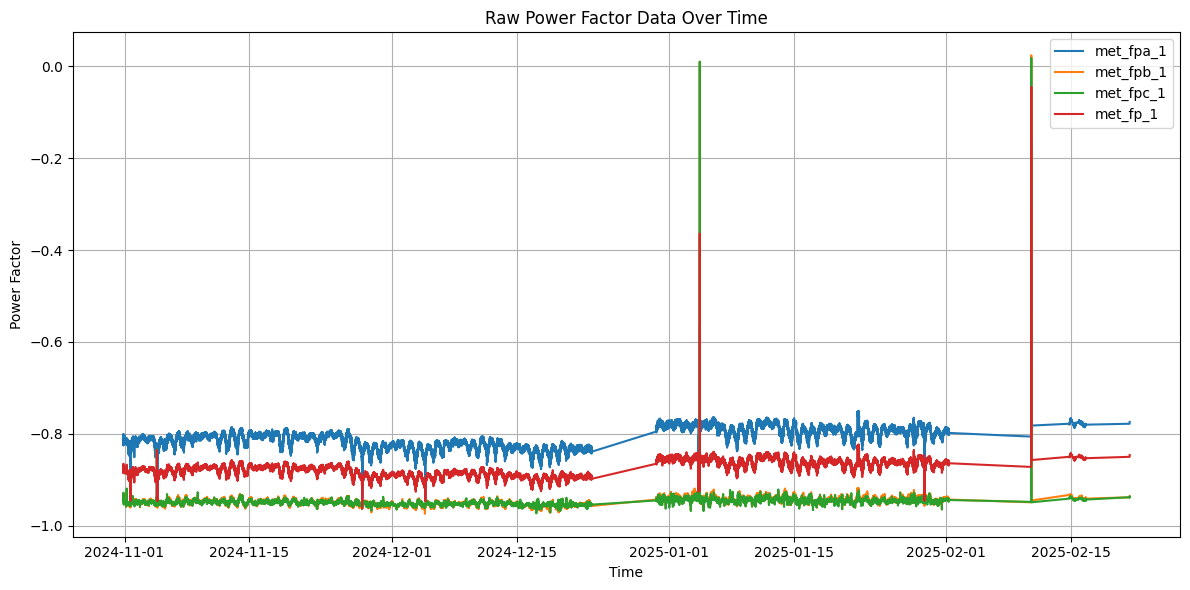

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.1642 - val_loss: 0.0247
Epoch 2/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0265 - val_loss: 0.0213
Epoch 3/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0220 - val_loss: 0.0207
Epoch 4/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0195 - val_loss: 0.0214
Epoch 5/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0184 - val_loss: 0.0194
Epoch 6/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0164 - val_loss: 0.0250
Epoch 7/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0148 - val_loss: 0.0278
Epoch 8/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0147 - val_loss: 0.0225
Epoch 9/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0156 - val_loss: 0.0266
Epoch 10/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0142 - val_loss: 0.0214
Epoch 11/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0136 - val_loss: 0.0308
Epoch 12/15
1029/1029 ━━━━━━━

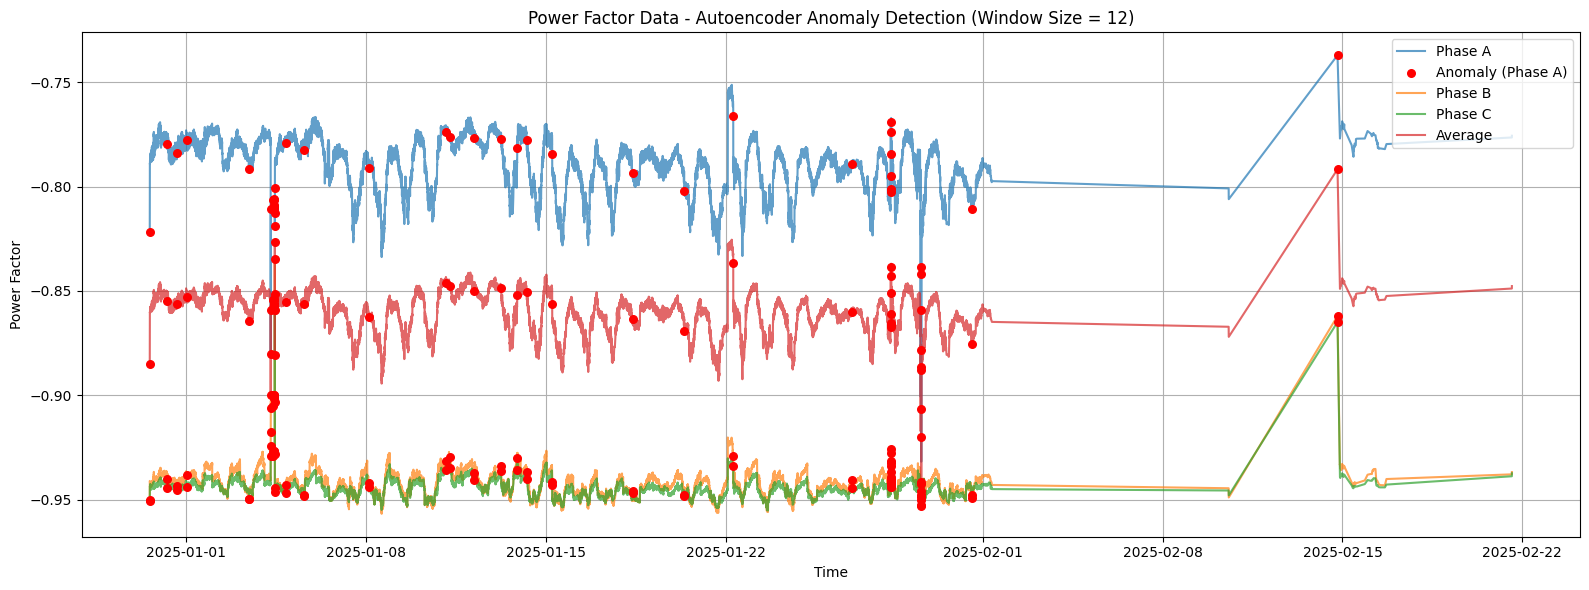

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Dropout, LeakyReLU
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Supervisor anomaly intervals for power factor data
supervisor_anomalies_fp = [
    (pd.Timestamp('2025-01-04 06:40'), pd.Timestamp('2025-01-04 06:42')),
    (pd.Timestamp('2025-01-04 06:42'), pd.Timestamp('2025-01-04 06:44')),
    (pd.Timestamp('2025-01-04 10:33'), pd.Timestamp('2025-01-04 10:35')),
    (pd.Timestamp('2025-01-22 01:42'), pd.Timestamp('2025-01-22 01:44')),
    (pd.Timestamp('2025-01-28 09:53'), pd.Timestamp('2025-01-28 09:54')),
    (pd.Timestamp('2025-01-28 09:55'), pd.Timestamp('2025-01-28 09:56')),
    (pd.Timestamp('2025-01-28 10:04'), pd.Timestamp('2025-01-28 10:06')),
    (pd.Timestamp('2025-01-29 13:51'), pd.Timestamp('2025-01-29 13:53')),
    (pd.Timestamp('2025-01-29 13:56'), pd.Timestamp('2025-01-29 13:58')),
    (pd.Timestamp('2025-01-29 14:25'), pd.Timestamp('2025-01-29 14:28')),
    (pd.Timestamp('2025-01-29 14:29'), pd.Timestamp('2025-01-29 14:33')),
    (pd.Timestamp('2025-02-10 13:47'), pd.Timestamp('2025-02-10 13:48')),
    (pd.Timestamp('2025-02-14 19:21'), pd.Timestamp('2025-02-14 19:30'))
]

# Plot raw power factor means
fp_cols = ['met_fpa_1', 'met_fpb_1', 'met_fpc_1', 'met_fp_1']
df_met1['data_hora'] = pd.to_datetime(df_met1['data_hora'])
df_met1 = df_met1.sort_values('data_hora')
plt.figure(figsize=(12, 6))
for col in fp_cols:
    plt.plot(df_met1['data_hora'], df_met1[col], label=col)
plt.title("Raw Power Factor Data Over Time")
plt.xlabel("Time")
plt.ylabel("Power Factor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Best model and window selection
best_window_fp = 12
best_model_fp = "Autoencoder"

# Prepare FP data
df_fp_met1 = df_met1[['met_fpa_1', 'met_fpb_1', 'met_fpc_1', 'met_fp_1']].copy()
df_fp_met1_win = window_dataframe_fp(df_fp_met1, window_size=best_window_fp)
df_fp_met1_win_plot = df_fp_met1_win.copy()
fp_phases_clean = ['fpa', 'fpb', 'fpc', 'fp']
for phase in fp_phases_clean:
    cols = [f"{phase}-1-{i+1}" for i in range(best_window_fp)]
    df_fp_met1_win_plot[f"{phase}_mean"] = df_fp_met1_win_plot[cols].mean(axis=1)
timestamps_fp = df_met1['data_hora'].sort_values().values
n_windows_fp = len(df_fp_met1_win_plot)
window_timestamps_fp = [timestamps_fp[(i+1)*best_window_fp - 1] for i in range(n_windows_fp)]
df_fp_met1_win_plot['window_time'] = pd.to_datetime(window_timestamps_fp)
df_fp_met1_win_plot = df_fp_met1_win_plot.set_index('window_time')

# Train-test split
test_start_fp = pd.to_datetime('2024-12-29')
test_end_fp = pd.to_datetime('2025-02-23')
test_mask_fp = (df_fp_met1_win_plot.index >= test_start_fp) & (df_fp_met1_win_plot.index <= test_end_fp)
df_test_fp = df_fp_met1_win_plot[test_mask_fp].copy()
df_train_fp = df_fp_met1_win_plot[~test_mask_fp].copy()

X_train_fp = df_train_fp.drop(columns=[c for c in df_train_fp.columns if c.endswith('_mean')])
X_test_fp = df_test_fp.drop(columns=[c for c in df_test_fp.columns if c.endswith('_mean')])

# === Final Autoencoder ===
def build_final_autoencoder_fp(input_dim):
    model = Sequential()
    model.add(Dense(64, input_shape=(input_dim,), kernel_regularizer=regularizers.l2(1e-4)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.1))
    model.add(Dense(32, kernel_regularizer=regularizers.l2(1e-4)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(16, kernel_regularizer=regularizers.l2(1e-4)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(64))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(input_dim, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    return model

# === Final LSTM ===
def build_final_lstm_fp(seq_len, n_features):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(seq_len, n_features)),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),
        RepeatVector(seq_len),
        LSTM(32, return_sequences=True),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),
        LSTM(64, return_sequences=True),
        LeakyReLU(alpha=0.1),
        TimeDistributed(Dense(n_features))
    ])
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')
    return model

if best_model_fp == "Autoencoder":
    scaler_fp = StandardScaler()
    X_train_fp_scaled = scaler_fp.fit_transform(X_train_fp)
    X_test_fp_scaled = scaler_fp.transform(X_test_fp)
    model_fp = build_final_autoencoder_fp(X_train_fp_scaled.shape[1])
    model_fp.fit(X_train_fp_scaled, X_train_fp_scaled, epochs=15, batch_size=32, validation_split=0.1,
                 callbacks=[EarlyStopping(patience=10, restore_best_weights=True)], verbose=1)
    recon_fp = model_fp.predict(X_test_fp_scaled)
    errors_fp = np.mean(np.square(X_test_fp_scaled - recon_fp), axis=1)
else:
    scaler_fp = MinMaxScaler()
    X_train_fp_scaled = scaler_fp.fit_transform(X_train_fp)
    X_test_fp_scaled = scaler_fp.transform(X_test_fp)
    n_features_fp = 4
    sequence_length_fp = best_window_fp
    X_train_fp_seq = X_train_fp_scaled.reshape(-1, sequence_length_fp, n_features_fp)
    X_test_fp_seq = X_test_fp_scaled.reshape(-1, sequence_length_fp, n_features_fp)
    model_fp = build_final_lstm_fp(sequence_length_fp, n_features_fp)
    model_fp.fit(X_train_fp_seq, X_train_fp_seq, epochs=15, batch_size=32, validation_split=0.1,
                 callbacks=[EarlyStopping(patience=10, restore_best_weights=True)], verbose=1)
    recon_seq_fp = model_fp.predict(X_test_fp_seq)
    errors_fp = np.mean(np.square(X_test_fp_seq - recon_seq_fp), axis=(1, 2))

threshold_fp = np.percentile(errors_fp, 99.8)
anomalies_fp = errors_fp > threshold_fp
df_test_fp['anomaly_score'] = errors_fp
df_test_fp['predicted_label'] = anomalies_fp.astype(int)

# Plot final anomaly results
fp_labels_clean = ['Phase A', 'Phase B', 'Phase C', 'Average']
plt.figure(figsize=(16, 6))
for phase, label in zip(fp_phases_clean, fp_labels_clean):
    plt.plot(df_test_fp.index, df_test_fp[f"{phase}_mean"], label=label, alpha=0.7)
    plt.scatter(
        df_test_fp.index[df_test_fp['predicted_label'] == 1],
        df_test_fp.loc[df_test_fp['predicted_label'] == 1, f"{phase}_mean"],
        color='red', s=30, zorder=10, label=f"Anomaly ({label})" if phase == fp_phases_clean[0] else ""
    )
plt.title(f"Power Factor Data - {best_model_fp} Anomaly Detection (Window Size = {best_window_fp})")
plt.xlabel("Time")
plt.ylabel("Power Factor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Compare to supervisor labels
predicted_anomaly_indices_fp = df_test_fp.index[df_test_fp['predicted_label'] == 1]
tp_fp, fp_fp, fn_fp = compare_anomalies(predicted_anomaly_indices_fp, supervisor_anomalies_fp)

# Create and display summary
summary_fp = pd.DataFrame({
    "Model": [best_model_fp],
    "Window Size": [best_window_fp],
    "Total Detected": [len(predicted_anomaly_indices_fp)],
    "True Positives": [len(tp_fp)],
    "False Positives": [len(fp_fp)],
    "False Negatives": [len(fn_fp)],
})

print("\nAnomaly Detection Performance Summary (Power Factor Data):")
summary_fp


Anomaly Detection Performance Summary (Power Factor Data):


,Model,Window Size,Total Detected,True Positives,False Positives,False Negatives
0,Autoencoder,12,45,10,35,3


In [ ]:
# Print detailed results
print("\nDetailed Results (Power Factor Data):")
print(f"Total anomalies detected: {len(predicted_anomaly_indices_fp)}")
print(f"True positives: {len(tp_fp)}")
print(f"False positives: {len(fp_fp)}")
print(f"False negatives: {len(fn_fp)}")

# Print the actual timestamps of anomalies
print("\nDetected Anomaly Timestamps (Power Factor Data):")
print(predicted_anomaly_indices_fp)

# Print supervisor's anomaly intervals that were missed (false negatives)
if len(fn_fp) > 0:
    print("\nMissed Anomaly Intervals (False Negatives - Power Factor Data):")
    for interval in fn_fp:
        print(f"From {interval[0]} to {interval[1]}")
else:
    print("\nNo missed anomalies (all supervisor intervals detected)")


Detailed Results (Power Factor Data):
Total anomalies detected: 45
True positives: 10
False positives: 35
False negatives: 3

Detected Anomaly Timestamps (Power Factor Data):
DatetimeIndex(['2024-12-30 13:43:43', '2024-12-31 05:31:13',
               '2024-12-31 14:50:51', '2025-01-01 00:33:06',
               '2025-01-03 10:29:16', '2025-01-04 06:42:36',
               '2025-01-04 06:50:49', '2025-01-04 08:32:03',
               '2025-01-04 09:02:56', '2025-01-04 09:44:26',
               '2025-01-04 09:46:30', '2025-01-04 09:50:37',
               '2025-01-04 09:52:40', '2025-01-04 09:54:44',
               '2025-01-04 10:09:09', '2025-01-04 10:17:23',
               '2025-01-04 10:33:50', '2025-01-04 10:35:54',
               '2025-01-04 20:44:46', '2025-01-05 14:17:24',
               '2025-01-08 02:55:02', '2025-01-11 02:39:59',
               '2025-01-11 05:49:53', '2025-01-12 04:30:31',
               '2025-01-13 05:39:54', '2025-01-13 21:07:26',
               '2025-01-14 05:5

#### **save the model**

In [ ]:
from google.colab import drive
from joblib import dump
from tensorflow.keras.models import load_model
from tensorflow.keras.models import save_model
import os
from joblib import load

# === Step 1: Mount Drive ===
# from google.colab import drive
# drive.mount('/content/drive')


 # Save model and scaler
save_model(model_fp, os.path.join(subset_dirs["meter1_powerfactor"], "autoencoder_model.keras"))
dump(scaler_fp, os.path.join(subset_dirs["meter1_powerfactor"], "scaler.pkl"))


# (Optional) Save evaluation summary
voltage_summary.to_csv(os.path.join(subset_dirs["meter1_powerfactor"], "summary.csv"), index=False)


In [ ]:
# Base path where models are stored
base_dir = "/content/drive/MyDrive/anomaly_detection_project"

# Choose the subset you want to load
subset = "meter1_powerfactor"  # Change this to the subset you're testing

# Build full paths
model_path = os.path.join(base_dir, subset, "autoencoder_model.keras")
scaler_path = os.path.join(base_dir, subset, "scaler.pkl")

from tensorflow.keras.models import load_model
from joblib import load

# Load trained model
model = load_model(model_path)

# Load scaler
scaler = load(scaler_path)

print("✅ Model and scaler loaded successfully!")

✅ Model and scaler loaded successfully!


## Meter 1 - Sequence Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Dropout, LeakyReLU
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Supervisor anomaly intervals for sequence data
supervisor_anomalies_seq = [
        # January 1
    (pd.Timestamp('2025-01-01 20:12'), pd.Timestamp('2025-01-01 20:13')),
    (pd.Timestamp('2025-01-01 20:12'), pd.Timestamp('2025-01-01 20:13')),  # seq_p
    (pd.Timestamp('2025-01-01 20:12'), pd.Timestamp('2025-01-01 20:13')),  # seq_n
    (pd.Timestamp('2025-01-01 20:12'), pd.Timestamp('2025-01-01 20:13')),  # zero_n

    # January 2
    (pd.Timestamp('2025-01-02 19:20'), pd.Timestamp('2025-01-02 19:21')),
    (pd.Timestamp('2025-01-02 19:22'), pd.Timestamp('2025-01-02 19:23')),

    # January 3
    (pd.Timestamp('2025-01-03 18:01'), pd.Timestamp('2025-01-03 18:02')),
    (pd.Timestamp('2025-01-03 18:03'), pd.Timestamp('2025-01-03 18:04')),

    # January 8
    (pd.Timestamp('2025-01-08 17:00'), pd.Timestamp('2025-01-08 22:00')),
    (pd.Timestamp('2025-01-08 17:00'), pd.Timestamp('2025-01-08 22:00')),  # seq_p
    (pd.Timestamp('2025-01-08 17:00'), pd.Timestamp('2025-01-08 22:00')),  # seq_n
    (pd.Timestamp('2025-01-08 17:00'), pd.Timestamp('2025-01-08 22:00')),  # zero_n

    # January 11
    (pd.Timestamp('2025-01-11 10:25'), pd.Timestamp('2025-01-11 13:20')),
    (pd.Timestamp('2025-01-11 10:25'), pd.Timestamp('2025-01-11 13:20')),  # seq_p
    (pd.Timestamp('2025-01-11 10:25'), pd.Timestamp('2025-01-11 13:20')),  # seq_n
    (pd.Timestamp('2025-01-11 10:25'), pd.Timestamp('2025-01-11 13:20')),  # zero_n

    # January 13
    (pd.Timestamp('2025-01-13 16:30'), pd.Timestamp('2025-01-13 21:15')),
    (pd.Timestamp('2025-01-13 16:30'), pd.Timestamp('2025-01-13 21:15')),  # seq_p
    (pd.Timestamp('2025-01-13 16:30'), pd.Timestamp('2025-01-13 21:15')),  # seq_n
    (pd.Timestamp('2025-01-13 16:30'), pd.Timestamp('2025-01-13 21:15')),  # zero_n

    # January 14
    (pd.Timestamp('2025-01-14 17:58'), pd.Timestamp('2025-01-14 19:55')),
    (pd.Timestamp('2025-01-14 17:58'), pd.Timestamp('2025-01-14 19:55')),  # seq_p
    (pd.Timestamp('2025-01-14 17:58'), pd.Timestamp('2025-01-14 19:55')),  # seq_n
    (pd.Timestamp('2025-01-14 17:58'), pd.Timestamp('2025-01-14 19:55')),  # zero_n

    # January 29
    (pd.Timestamp('2025-01-29 13:51'), pd.Timestamp('2025-01-29 13:54')),
    (pd.Timestamp('2025-01-29 13:51'), pd.Timestamp('2025-01-29 13:54')),  # seq_p
    (pd.Timestamp('2025-01-29 13:51'), pd.Timestamp('2025-01-29 13:54')),  # seq_n
    (pd.Timestamp('2025-01-29 13:51'), pd.Timestamp('2025-01-29 13:54')),  # zero_n

    (pd.Timestamp('2025-01-29 13:55'), pd.Timestamp('2025-01-29 13:57')),
    (pd.Timestamp('2025-01-29 13:55'), pd.Timestamp('2025-01-29 13:57')),  # seq_p
    (pd.Timestamp('2025-01-29 13:55'), pd.Timestamp('2025-01-29 13:57')),  # seq_n
    (pd.Timestamp('2025-01-29 13:55'), pd.Timestamp('2025-01-29 13:57')),  # zero_n

    (pd.Timestamp('2025-01-29 14:26'), pd.Timestamp('2025-01-29 14:28')),
    (pd.Timestamp('2025-01-29 14:26'), pd.Timestamp('2025-01-29 14:28')),  # seq_p
    (pd.Timestamp('2025-01-29 14:26'), pd.Timestamp('2025-01-29 14:28')),  # seq_n
    (pd.Timestamp('2025-01-29 14:26'), pd.Timestamp('2025-01-29 14:28')),  # zero_n

    (pd.Timestamp('2025-01-29 14:28'), pd.Timestamp('2025-01-29 14:34')),
    (pd.Timestamp('2025-01-29 14:28'), pd.Timestamp('2025-01-29 14:34')),  # seq_p
    (pd.Timestamp('2025-01-29 14:28'), pd.Timestamp('2025-01-29 14:34')),  # seq_n
    (pd.Timestamp('2025-01-29 14:28'), pd.Timestamp('2025-01-29 14:34'))   # zero_n
]

def is_true_positive(ts, intervals):
    return any(start <= ts <= end for start, end in intervals)

def compare_anomalies(detected_indices, intervals):
    true_positives = [ts for ts in detected_indices if is_true_positive(ts, intervals)]
    false_positives = [ts for ts in detected_indices if not is_true_positive(ts, intervals)]
    false_negatives = [interval for interval in intervals if not any(is_true_positive(ts, [interval]) for ts in detected_indices)]
    return true_positives, false_positives, false_negatives

def window_dataframe_seq(df, window_size=12):
    n_rows = df.shape[0]
    n_windows = n_rows // window_size
    df_trunc = df.iloc[:n_windows * window_size]
    data = df_trunc.values.reshape(n_windows, window_size, df.shape[1])
    new_columns = []
    for col in df.columns:
        for i in range(window_size):
            base = col.replace('met_', '').replace('_1', '')
            new_columns.append(f"{base}-1-{i+1}")
    data_2d = data.transpose(0, 2, 1).reshape(n_windows, -1)
    return pd.DataFrame(data_2d, columns=new_columns)

def build_autoencoder_seq(input_dim):
    model = Sequential()
    model.add(Dense(64, input_shape=(input_dim,), kernel_regularizer=regularizers.l2(1e-4)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.1))
    model.add(Dense(32, kernel_regularizer=regularizers.l2(1e-4)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(16, kernel_regularizer=regularizers.l2(1e-4)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(64))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(input_dim, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    return model

def build_lstm_autoencoder_seq(seq_len, n_features):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(seq_len, n_features)),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),
        RepeatVector(seq_len),
        LSTM(32, return_sequences=True),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),
        LSTM(64, return_sequences=True),
        LeakyReLU(alpha=0.1),
        TimeDistributed(Dense(n_features))
    ])
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')
    return model

In [ ]:


# Multi-window-size analysis for sequence data
window_sizes_seq = [12, 16, 25]
results_seq = []
seq_vars_clean = ['ia_seq_p', 'ia_seq_n', 'ia_zero_n', 'i_imb', 'i_leak']

for window_size_seq in window_sizes_seq:
    df_seq_met1 = df_met1[['met_ia_seq_p_1', 'met_ia_seq_n_1', 'met_ia_zero_n_1', 'met_i_imb_1', 'met_i_leak_1']].copy()
    df_seq_met1_win = window_dataframe_seq(df_seq_met1, window_size=window_size_seq)
    df_seq_met1_win_plot = df_seq_met1_win.copy()

    for var in seq_vars_clean:
        cols = [f"{var}-1-{i+1}" for i in range(window_size_seq)]
        df_seq_met1_win_plot[f"{var}_mean"] = df_seq_met1_win_plot[cols].mean(axis=1)

    timestamps_seq = df_met1['data_hora'].sort_values().values
    n_windows_seq = len(df_seq_met1_win_plot)
    window_timestamps_seq = [timestamps_seq[(i+1)*window_size_seq - 1] for i in range(n_windows_seq)]
    df_seq_met1_win_plot['window_time'] = pd.to_datetime(window_timestamps_seq)
    df_seq_met1_win_plot = df_seq_met1_win_plot.set_index('window_time')

    test_start_seq = pd.to_datetime('2024-12-29')
    test_end_seq = pd.to_datetime('2025-02-23')
    test_mask_seq = (df_seq_met1_win_plot.index >= test_start_seq) & (df_seq_met1_win_plot.index <= test_end_seq)
    df_test_seq = df_seq_met1_win_plot[test_mask_seq].copy()
    df_train_seq = df_seq_met1_win_plot[~test_mask_seq].copy()

    X_train_seq = df_train_seq.drop(columns=[c for c in df_train_seq.columns if c.endswith('_mean')])
    X_test_seq = df_test_seq.drop(columns=[c for c in df_test_seq.columns if c.endswith('_mean')])

    scaler_ae_seq = StandardScaler()
    X_train_seq_ae = scaler_ae_seq.fit_transform(X_train_seq)
    X_test_seq_ae = scaler_ae_seq.transform(X_test_seq)

    model_ae_seq = build_autoencoder_seq(X_train_seq_ae.shape[1])
    model_ae_seq.fit(X_train_seq_ae, X_train_seq_ae, epochs=10, batch_size=32, validation_split=0.1,
                     callbacks=[EarlyStopping(patience=5, restore_best_weights=True)], verbose=0)

    recon_ae_seq = model_ae_seq.predict(X_test_seq_ae)
    recon_err_ae_seq = np.mean((X_test_seq_ae - recon_ae_seq)**2, axis=1)
    thresh_ae_seq = np.percentile(recon_err_ae_seq, 99.8)
    labels_ae_seq = (recon_err_ae_seq > thresh_ae_seq).astype(int)

    scaler_lstm_seq = MinMaxScaler()
    X_train_seq_lstm = scaler_lstm_seq.fit_transform(X_train_seq)
    X_test_seq_lstm = scaler_lstm_seq.transform(X_test_seq)
    X_train_seq_seq = X_train_seq_lstm.reshape(-1, window_size_seq, 5)
    X_test_seq_seq = X_test_seq_lstm.reshape(-1, window_size_seq, 5)

    model_lstm_seq = build_lstm_autoencoder_seq(window_size_seq, 5)
    model_lstm_seq.fit(X_train_seq_seq, X_train_seq_seq, epochs=10, batch_size=32, validation_split=0.1,
                       callbacks=[EarlyStopping(patience=5, restore_best_weights=True)], verbose=0)

    recon_lstm_seq = model_lstm_seq.predict(X_test_seq_seq)
    recon_err_lstm_seq = np.mean(np.square(X_test_seq_seq - recon_lstm_seq), axis=(1, 2))
    thresh_lstm_seq = np.percentile(recon_err_lstm_seq, 99.8)
    labels_lstm_seq = (recon_err_lstm_seq > thresh_lstm_seq).astype(int)

    detected_ae_seq = df_test_seq.index[labels_ae_seq == 1]
    detected_lstm_seq = df_test_seq.index[labels_lstm_seq == 1]
    tp_ae_seq, fp_ae_seq, fn_ae_seq = compare_anomalies(detected_ae_seq, supervisor_anomalies_seq)
    tp_lstm_seq, fp_lstm_seq, fn_lstm_seq = compare_anomalies(detected_lstm_seq, supervisor_anomalies_seq)

    results_seq.append({
        "Model": "Autoencoder", "Window Size": window_size_seq, "Total Detected": len(detected_ae_seq),
        "True Positives": len(tp_ae_seq), "False Positives": len(fp_ae_seq), "False Negatives": len(fn_ae_seq)
    })
    results_seq.append({
        "Model": "LSTM", "Window Size": window_size_seq, "Total Detected": len(detected_lstm_seq),
        "True Positives": len(tp_lstm_seq), "False Positives": len(fp_lstm_seq), "False Negatives": len(fn_lstm_seq)
    })


In [ ]:
# Show summary
summary_seq = pd.DataFrame(results_seq)
summary_seq

/tmp/ipython-input-70-385767481.py:40: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


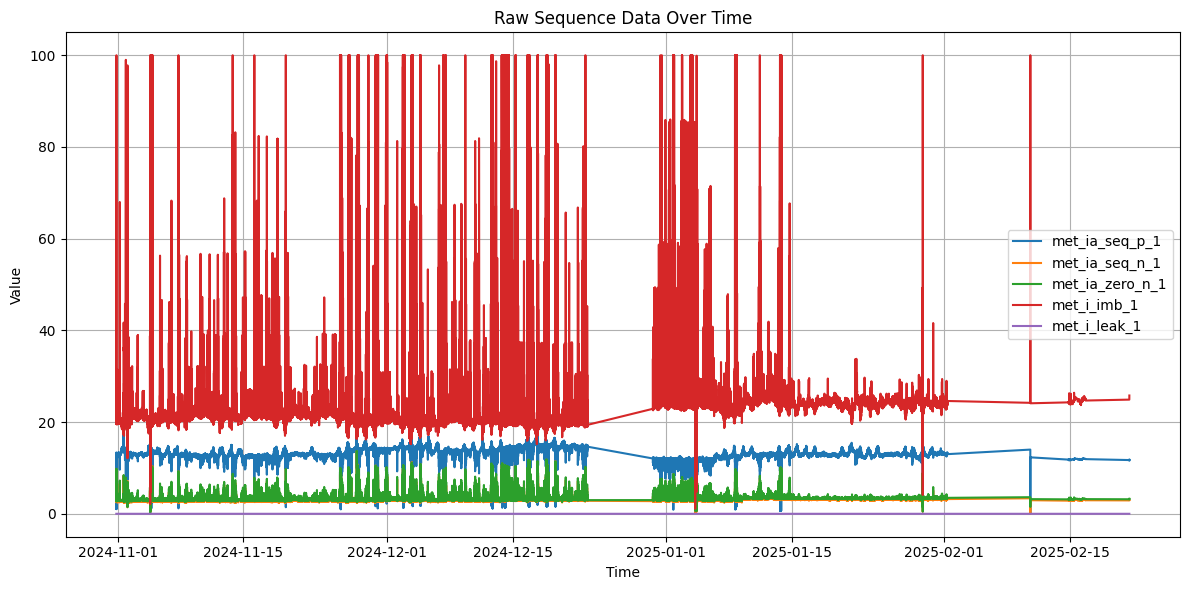

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


772/772 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.3017 - val_loss: 0.1644
Epoch 2/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.1451 - val_loss: 0.1340
Epoch 3/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1233 - val_loss: 0.1235
Epoch 4/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.1104 - val_loss: 0.1149
Epoch 5/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0972 - val_loss: 0.1097
Epoch 6/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0955 - val_loss: 0.1377
Epoch 7/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0923 - val_loss: 0.0908
Epoch 8/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0854 - val_loss: 0.0883
Epoch 9/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0847 - val_loss: 0.0842
Epoch 10/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0776 - val_loss: 0.0979
519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


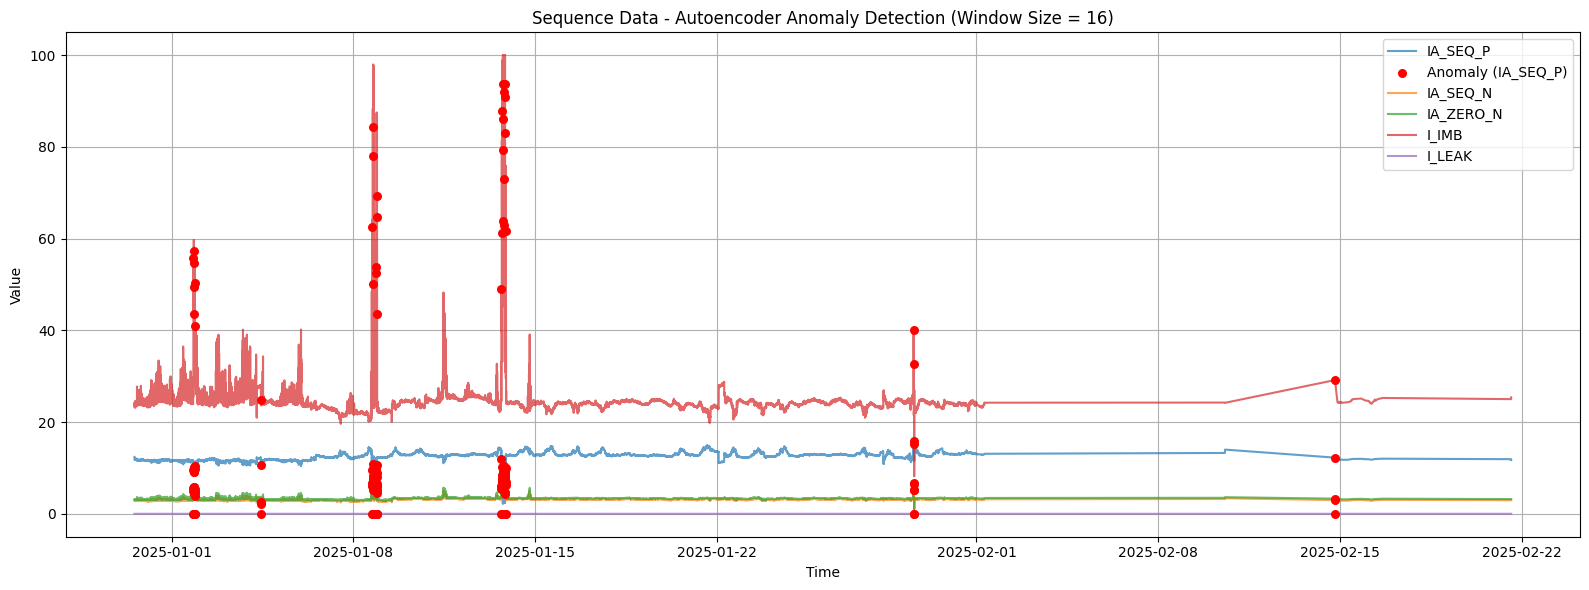

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Dropout, LeakyReLU
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Supervisor anomaly intervals for sequence data
supervisor_anomalies_seq = [
    (pd.Timestamp('2025-01-01 20:12'), pd.Timestamp('2025-01-01 20:13')),
    (pd.Timestamp('2025-01-02 19:20'), pd.Timestamp('2025-01-02 19:21')),
    (pd.Timestamp('2025-01-02 19:22'), pd.Timestamp('2025-01-02 19:23')),
    (pd.Timestamp('2025-01-03 18:01'), pd.Timestamp('2025-01-03 18:02')),
    (pd.Timestamp('2025-01-03 18:03'), pd.Timestamp('2025-01-03 18:04')),
    (pd.Timestamp('2025-01-08 17:00'), pd.Timestamp('2025-01-08 22:00')),
    (pd.Timestamp('2025-01-11 10:25'), pd.Timestamp('2025-01-11 13:20')),
    (pd.Timestamp('2025-01-13 16:30'), pd.Timestamp('2025-01-13 21:15')),
    (pd.Timestamp('2025-01-14 17:58'), pd.Timestamp('2025-01-14 19:55')),
    (pd.Timestamp('2025-01-29 13:51'), pd.Timestamp('2025-01-29 13:54')),
    (pd.Timestamp('2025-01-29 13:55'), pd.Timestamp('2025-01-29 13:57')),
    (pd.Timestamp('2025-01-29 14:26'), pd.Timestamp('2025-01-29 14:28')),
    (pd.Timestamp('2025-01-29 14:28'), pd.Timestamp('2025-01-29 14:34'))
]

# Plot raw sequence variable means
seq_cols = ['met_ia_seq_p_1', 'met_ia_seq_n_1', 'met_ia_zero_n_1', 'met_i_imb_1', 'met_i_leak_1']
df_met1['data_hora'] = pd.to_datetime(df_met1['data_hora'])
df_met1 = df_met1.sort_values('data_hora')
plt.figure(figsize=(12, 6))
for col in seq_cols:
    plt.plot(df_met1['data_hora'], df_met1[col], label=col)
plt.title("Raw Sequence Data Over Time")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Best model and window selection
best_window_seq = 16
best_model_seq = "Autoencoder"

# Prepare Sequence Data
df_seq_met1 = df_met1[seq_cols].copy()
df_seq_met1_win = window_dataframe_seq(df_seq_met1, window_size=best_window_seq)
df_seq_met1_win_plot = df_seq_met1_win.copy()
seq_vars_clean = ['ia_seq_p', 'ia_seq_n', 'ia_zero_n', 'i_imb', 'i_leak']
for var in seq_vars_clean:
    cols = [f"{var}-1-{i+1}" for i in range(best_window_seq)]
    df_seq_met1_win_plot[f"{var}_mean"] = df_seq_met1_win_plot[cols].mean(axis=1)
timestamps_seq = df_met1['data_hora'].sort_values().values
n_windows_seq = len(df_seq_met1_win_plot)
window_timestamps_seq = [timestamps_seq[(i+1)*best_window_seq - 1] for i in range(n_windows_seq)]
df_seq_met1_win_plot['window_time'] = pd.to_datetime(window_timestamps_seq)
df_seq_met1_win_plot = df_seq_met1_win_plot.set_index('window_time')

# Train-test split
test_start_seq = pd.to_datetime('2024-12-29')
test_end_seq = pd.to_datetime('2025-02-23')
test_mask_seq = (df_seq_met1_win_plot.index >= test_start_seq) & (df_seq_met1_win_plot.index <= test_end_seq)
df_test_seq = df_seq_met1_win_plot[test_mask_seq].copy()
df_train_seq = df_seq_met1_win_plot[~test_mask_seq].copy()

X_train_seq = df_train_seq.drop(columns=[c for c in df_train_seq.columns if c.endswith('_mean')])
X_test_seq = df_test_seq.drop(columns=[c for c in df_test_seq.columns if c.endswith('_mean')])

# === Final Autoencoder ===
def build_final_autoencoder_seq(input_dim):
    model = Sequential()
    model.add(Dense(64, input_shape=(input_dim,), kernel_regularizer=regularizers.l2(1e-4)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.1))
    model.add(Dense(32, kernel_regularizer=regularizers.l2(1e-4)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(16, kernel_regularizer=regularizers.l2(1e-4)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(64))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(input_dim, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    return model

# === Final LSTM ===
def build_final_lstm_seq(seq_len, n_features):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(seq_len, n_features)),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),
        RepeatVector(seq_len),
        LSTM(32, return_sequences=True),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),
        LSTM(64, return_sequences=True),
        LeakyReLU(alpha=0.1),
        TimeDistributed(Dense(n_features))
    ])
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')
    return model

if best_model_seq == "Autoencoder":
    scaler_seq = StandardScaler()
    X_train_seq_scaled = scaler_seq.fit_transform(X_train_seq)
    X_test_seq_scaled = scaler_seq.transform(X_test_seq)
    model_seq = build_final_autoencoder_seq(X_train_seq_scaled.shape[1])
    model_seq.fit(X_train_seq_scaled, X_train_seq_scaled, epochs=10, batch_size=32, validation_split=0.1,
                  callbacks=[EarlyStopping(patience=10, restore_best_weights=True)], verbose=1)
    recon_seq = model_seq.predict(X_test_seq_scaled)
    errors_seq = np.mean(np.square(X_test_seq_scaled - recon_seq), axis=1)
else:
    scaler_seq = MinMaxScaler()
    X_train_seq_scaled = scaler_seq.fit_transform(X_train_seq)
    X_test_seq_scaled = scaler_seq.transform(X_test_seq)
    n_features_seq = 5
    sequence_length_seq = best_window_seq
    X_train_seq_seq = X_train_seq_scaled.reshape(-1, sequence_length_seq, n_features_seq)
    X_test_seq_seq = X_test_seq_scaled.reshape(-1, sequence_length_seq, n_features_seq)
    model_seq = build_final_lstm_seq(sequence_length_seq, n_features_seq)
    model_seq.fit(X_train_seq_seq, X_train_seq_seq, epochs=10, batch_size=32, validation_split=0.1,
                  callbacks=[EarlyStopping(patience=10, restore_best_weights=True)], verbose=1)
    recon_seq_seq = model_seq.predict(X_test_seq_seq)
    errors_seq = np.mean(np.square(X_test_seq_seq - recon_seq_seq), axis=(1, 2))

threshold_seq = np.percentile(errors_seq, 99.8)
anomalies_seq = errors_seq > threshold_seq
df_test_seq['anomaly_score'] = errors_seq
df_test_seq['predicted_label'] = anomalies_seq.astype(int)

# Plot final anomaly results
seq_labels_clean = ['IA_SEQ_P', 'IA_SEQ_N', 'IA_ZERO_N', 'I_IMB', 'I_LEAK']
plt.figure(figsize=(16, 6))
for var, label in zip(seq_vars_clean, seq_labels_clean):
    plt.plot(df_test_seq.index, df_test_seq[f"{var}_mean"], label=label, alpha=0.7)
    plt.scatter(
        df_test_seq.index[df_test_seq['predicted_label'] == 1],
        df_test_seq.loc[df_test_seq['predicted_label'] == 1, f"{var}_mean"],
        color='red', s=30, zorder=10, label=f"Anomaly ({label})" if var == seq_vars_clean[0] else ""
    )
plt.title(f"Sequence Data - {best_model_seq} Anomaly Detection (Window Size = {best_window_seq})")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Compare to supervisor labels
predicted_anomaly_indices_seq = df_test_seq.index[df_test_seq['predicted_label'] == 1]
tp_seq, fp_seq, fn_seq = compare_anomalies(predicted_anomaly_indices_seq, supervisor_anomalies_seq)

In [ ]:
# Create and display summary
summary_seq = pd.DataFrame({
    "Model": [best_model_seq],
    "Window Size": [best_window_seq],
    "Total Detected": [len(predicted_anomaly_indices_seq)],
    "True Positives": [len(tp_seq)],
    "False Positives": [len(fp_seq)],
    "False Negatives": [len(fn_seq)],
})

print("\nAnomaly Detection Performance Summary (Sequence Data):")
summary_seq


Anomaly Detection Performance Summary (Sequence Data):


,Model,Window Size,Total Detected,True Positives,False Positives,False Negatives
0,Autoencoder,16,34,25,9,9


In [ ]:

print("\nDetailed Results (Sequence Data):")
print(f"Total anomalies detected: {len(predicted_anomaly_indices_seq)}")
print(f"True positives: {len(tp_seq)}")
print(f"False positives: {len(fp_seq)}")
print(f"False negatives: {len(fn_seq)}")

print("\nDetected Anomaly Timestamps (Sequence Data):")
print(predicted_anomaly_indices_seq)

if len(fn_seq) > 0:
    print("\nMissed Anomaly Intervals (False Negatives - Sequence Data):")
    for interval in fn_seq:
        print(f"From {interval[0]} to {interval[1]}")
else:
    print("\nNo missed anomalies (all supervisor intervals detected)")



Detailed Results (Sequence Data):
Total anomalies detected: 34
True positives: 25
False positives: 9
False negatives: 9

Detected Anomaly Timestamps (Sequence Data):
DatetimeIndex(['2025-01-01 20:15:03', '2025-01-01 20:20:33',
               '2025-01-01 20:23:17', '2025-01-01 20:37:00',
               '2025-01-01 20:47:59', '2025-01-01 21:18:11',
               '2025-01-01 22:02:27', '2025-01-04 10:35:13',
               '2025-01-08 17:42:12', '2025-01-08 18:09:41',
               '2025-01-08 18:15:10', '2025-01-08 18:23:25',
               '2025-01-08 21:03:10', '2025-01-08 21:22:24',
               '2025-01-08 21:33:23', '2025-01-08 21:47:07',
               '2025-01-08 21:49:54', '2025-01-13 16:54:46',
               '2025-01-13 17:26:31', '2025-01-13 17:50:50',
               '2025-01-13 18:06:16', '2025-01-13 18:19:17',
               '2025-01-13 18:30:47', '2025-01-13 18:33:42',
               '2025-01-13 19:17:11', '2025-01-13 19:22:58',
               '2025-01-13 19:34:48', '2

#### **saving the model**

In [ ]:
# === Step 1: Mount Drive ===
# from google.colab import drive
# drive.mount('/content/drive')


 # Save model and scaler
save_model(model_seq, os.path.join(subset_dirs["meter1_sequence"], "autoencoder_model.keras"))
dump(scaler_seq, os.path.join(subset_dirs["meter1_sequence"], "scaler.pkl"))


# (Optional) Save evaluation summary
voltage_summary.to_csv(os.path.join(subset_dirs["meter1_sequence"], "summary.csv"), index=False)


In [ ]:
# Base path where models are stored
base_dir = "/content/drive/MyDrive/anomaly_detection_project"

# Choose the subset you want to load
subset = "meter1_sequence"  # Change this to the subset you're testing

# Build full paths
model_path = os.path.join(base_dir, subset, "autoencoder_model.keras")
scaler_path = os.path.join(base_dir, subset, "scaler.pkl")

from tensorflow.keras.models import load_model
from joblib import load

# Load trained model
model = load_model(model_path)

# Load scaler
scaler = load(scaler_path)

print("✅ Model and scaler loaded successfully!")

✅ Model and scaler loaded successfully!


# **Met_2 data**

In [ ]:
# Split met_2 data
df_met2_v = df_met2[['met_va_2', 'met_vb_2', 'met_vc_2', 'met_v_2']].copy()
df_met2_i = df_met2[['met_ia_2', 'met_ib_2', 'met_ic_2', 'met_i_2', 'met_in_2']].copy()
df_met2_fp = df_met2[['met_fpa_2', 'met_fpb_2', 'met_fpc_2', 'met_fp_2']].copy()
df_met2_seq = df_met2[['met_ia_seq_p_2', 'met_ia_seq_n_2', 'met_ia_zero_n_2', 'met_i_imb_2', 'met_i_leak_2']].copy()

## Meter 2 - voltage data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Dropout, LeakyReLU
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Supervisor anomaly intervals for voltage data (Meter 2)
supervisor_anomalies_v2 = []

def is_true_positive(ts, intervals):
    return any(start <= ts <= end for start, end in intervals)

def compare_anomalies(detected_indices, intervals):
    true_positives = [ts for ts in detected_indices if is_true_positive(ts, intervals)]
    false_positives = [ts for ts in detected_indices if not is_true_positive(ts, intervals)]
    false_negatives = [interval for interval in intervals if not any(is_true_positive(ts, [interval]) for ts in detected_indices)]
    return true_positives, false_positives, false_negatives

def window_dataframe_v(df, window_size=12):
    n_rows = df.shape[0]
    n_windows = n_rows // window_size
    df_trunc = df.iloc[:n_windows * window_size]
    data = df_trunc.values.reshape(n_windows, window_size, df.shape[1])
    new_columns = []
    for col in df.columns:
        for i in range(window_size):
            base = col.replace('met_', '').replace('_2', '')
            new_columns.append(f"{base}_2-1-{i+1}")
    data_2d = data.transpose(0, 2, 1).reshape(n_windows, -1)
    return pd.DataFrame(data_2d, columns=new_columns)

def build_autoencoder_v2(input_dim):
    model = Sequential()
    model.add(Dense(64, input_shape=(input_dim,), kernel_regularizer=regularizers.l2(1e-4)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.1))
    model.add(Dense(32, kernel_regularizer=regularizers.l2(1e-4)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(16, kernel_regularizer=regularizers.l2(1e-4)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(64))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(input_dim, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    return model

def build_lstm_autoencoder_v2(seq_len, n_features):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(seq_len, n_features)),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),
        RepeatVector(seq_len),
        LSTM(32, return_sequences=True),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),
        LSTM(64, return_sequences=True),
        LeakyReLU(alpha=0.1),
        TimeDistributed(Dense(n_features))
    ])
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')
    return model

In [ ]:


# Analysis for multiple window sizes
window_sizes_v2 = [12, 16, 25]
results_v2 = []
voltage_phases = ['va', 'vb', 'vc', 'v']

for window_size_v2 in window_sizes_v2:
    df_v2 = df_met2[['met_va_2', 'met_vb_2', 'met_vc_2', 'met_v_2']].copy()
    df_v2_win = window_dataframe_v(df_v2, window_size=window_size_v2)
    df_v2_win_plot = df_v2_win.copy()

    for phase in voltage_phases:
        cols = [f"{phase}_2-1-{i+1}" for i in range(window_size_v2)]
        df_v2_win_plot[f"{phase}_mean"] = df_v2_win_plot[cols].mean(axis=1)

    timestamps = df_met2['data_hora'].sort_values().values
    n_windows = len(df_v2_win_plot)
    window_timestamps = [timestamps[(i+1)*window_size_v2 - 1] for i in range(n_windows)]
    df_v2_win_plot['window_time'] = pd.to_datetime(window_timestamps)
    df_v2_win_plot = df_v2_win_plot.set_index('window_time')

    test_start = pd.to_datetime('2024-12-29')
    test_end = pd.to_datetime('2025-02-23')
    test_mask = (df_v2_win_plot.index >= test_start) & (df_v2_win_plot.index <= test_end)
    df_test = df_v2_win_plot[test_mask].copy()
    df_train = df_v2_win_plot[~test_mask].copy()

    X_train = df_train.drop(columns=[c for c in df_train.columns if c.endswith('_mean')])
    X_test = df_test.drop(columns=[c for c in df_test.columns if c.endswith('_mean')])

    # Autoencoder
    scaler_ae = StandardScaler()
    X_train_ae = scaler_ae.fit_transform(X_train)
    X_test_ae = scaler_ae.transform(X_test)

    model_ae = build_autoencoder_v2(X_train_ae.shape[1])
    model_ae.fit(X_train_ae, X_train_ae, epochs=15, batch_size=32, validation_split=0.1,
                 callbacks=[EarlyStopping(patience=5, restore_best_weights=True)], verbose=0)

    recon_ae = model_ae.predict(X_test_ae)
    err_ae = np.mean((X_test_ae - recon_ae)**2, axis=1)
    thresh_ae = np.percentile(err_ae, 99.8)
    labels_ae = (err_ae > thresh_ae).astype(int)

    # LSTM
    scaler_lstm = MinMaxScaler()
    X_train_lstm = scaler_lstm.fit_transform(X_train)
    X_test_lstm = scaler_lstm.transform(X_test)
    X_train_seq = X_train_lstm.reshape(-1, window_size_v2, 4)
    X_test_seq = X_test_lstm.reshape(-1, window_size_v2, 4)

    model_lstm = build_lstm_autoencoder_v2(window_size_v2, 4)
    model_lstm.fit(X_train_seq, X_train_seq, epochs=15, batch_size=32, validation_split=0.1,
                   callbacks=[EarlyStopping(patience=5, restore_best_weights=True)], verbose=0)

    recon_lstm = model_lstm.predict(X_test_seq)
    err_lstm = np.mean(np.square(X_test_seq - recon_lstm), axis=(1, 2))
    thresh_lstm = np.percentile(err_lstm, 99.8)
    labels_lstm = (err_lstm > thresh_lstm).astype(int)

    detected_ae = df_test.index[labels_ae == 1]
    detected_lstm = df_test.index[labels_lstm == 1]
    tp_ae, fp_ae, fn_ae = compare_anomalies(detected_ae, supervisor_anomalies_v2)
    tp_lstm, fp_lstm, fn_lstm = compare_anomalies(detected_lstm, supervisor_anomalies_v2)

    results_v2.append({
        "Model": "Autoencoder", "Window Size": window_size_v2, "Total Detected": len(detected_ae),
        "True Positives": len(tp_ae), "False Positives": len(fp_ae), "False Negatives": len(fn_ae)
    })
    results_v2.append({
        "Model": "LSTM", "Window Size": window_size_v2, "Total Detected": len(detected_lstm),
        "True Positives": len(tp_lstm), "False Positives": len(fp_lstm), "False Negatives": len(fn_lstm)
    })


In [ ]:
# Show summary
summary_v2 = pd.DataFrame(results_v2)
summary_v2

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/15
412/412 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.6330 - val_loss: 0.4613
Epoch 2/15
412/412 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4566 - val_loss: 0.4331
Epoch 3/15
412/412 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4361 - val_loss: 0.4175
Epoch 4/15
412/412 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4197 - val_loss: 0.4033
Epoch 5/15
412/412 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.4086 - val_loss: 0.3940
Epoch 6/15
412/412 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.3981 - val_loss: 0.3892
Epoch 7/15
412/412 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3938 - val_loss: 0.3825
Epoch 8/15
412/412 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3872 - val_loss: 0.3780
Epoch 9/15
412/412 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3823 - val_loss: 0.3747
Epoch 10/15
412/412 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3795 - val_loss: 0.3728
Epoch 11/15
412/412 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3757 - val_loss: 0.3697
Epoch 12/15
412/412 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step

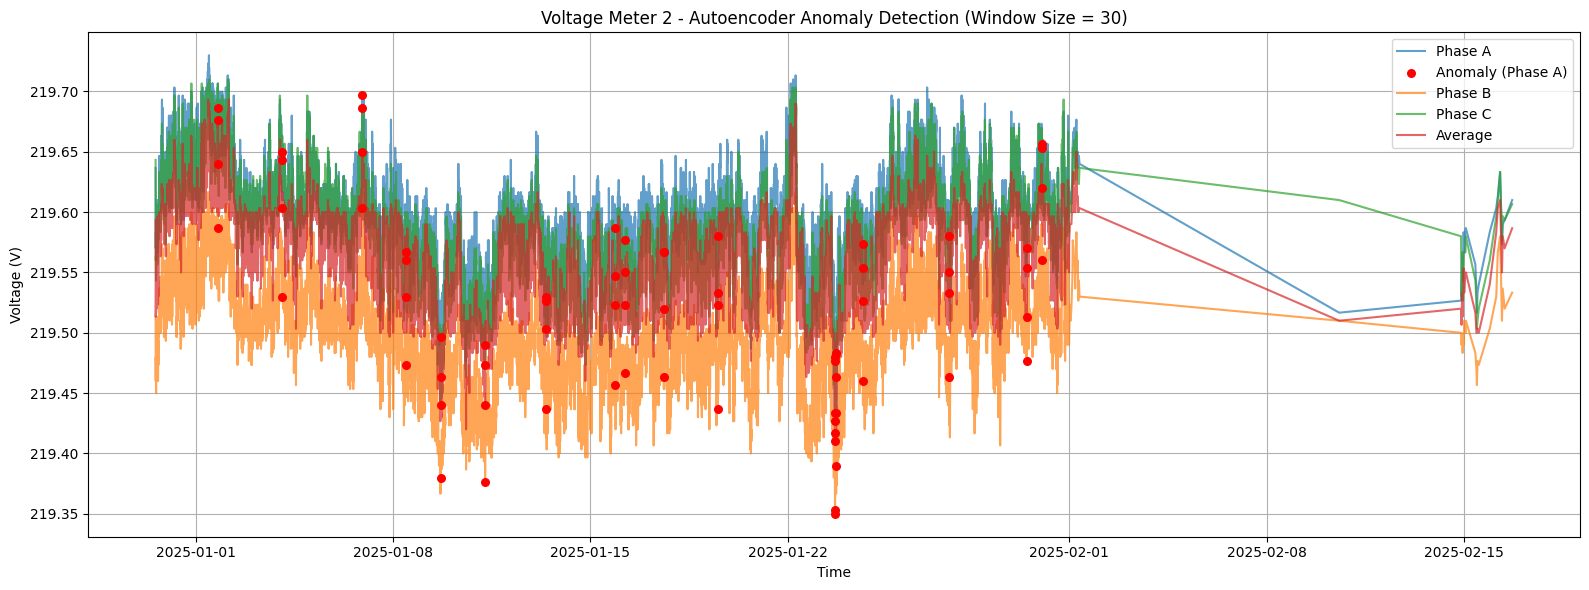

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Dropout, LeakyReLU
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Supervisor anomaly intervals for voltage data (replace with real ones if available)
supervisor_anomalies_v = []

def is_true_positive(ts, intervals):
    return any(start <= ts <= end for start, end in intervals)

def compare_anomalies(detected_indices, intervals):
    true_positives = [ts for ts in detected_indices if is_true_positive(ts, intervals)]
    false_positives = [ts for ts in detected_indices if not is_true_positive(ts, intervals)]
    false_negatives = [interval for interval in intervals if not any(is_true_positive(ts, [interval]) for ts in detected_indices)]
    return true_positives, false_positives, false_negatives

def window_dataframe_v(df, window_size=12):
    n_rows = df.shape[0]
    n_windows = n_rows // window_size
    df_trunc = df.iloc[:n_windows * window_size]
    data = df_trunc.values.reshape(n_windows, window_size, df.shape[1])
    new_columns = []
    for col in df.columns:
        for i in range(window_size):
            base = col.replace('met_', '').replace('_2', '')
            new_columns.append(f"{base}-2-{i+1}")
    data_2d = data.transpose(0, 2, 1).reshape(n_windows, -1)
    return pd.DataFrame(data_2d, columns=new_columns)

def build_autoencoder_v(input_dim):
    model = Sequential()
    model.add(Dense(64, input_shape=(input_dim,), kernel_regularizer=regularizers.l2(1e-4)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.1))
    model.add(Dense(32, kernel_regularizer=regularizers.l2(1e-4)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(16, kernel_regularizer=regularizers.l2(1e-4)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(64))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(input_dim, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    return model

# Config
best_window_v = 30
best_model_v = "Autoencoder"
phases_clean = ['va', 'vb', 'vc', 'v']

# Prepare data
df_v_met2 = df_met2[['met_va_2', 'met_vb_2', 'met_vc_2', 'met_v_2']].copy()
df_v_met2_win = window_dataframe_v(df_v_met2, window_size=best_window_v)
df_v_met2_win_plot = df_v_met2_win.copy()

for phase in phases_clean:
    cols = [f"{phase}-2-{i+1}" for i in range(best_window_v)]
    df_v_met2_win_plot[f"{phase}_mean"] = df_v_met2_win_plot[cols].mean(axis=1)

# Timestamps
df_met2['data_hora'] = pd.to_datetime(df_met2['data_hora'])
df_met2 = df_met2.sort_values('data_hora')
timestamps_v = df_met2['data_hora'].sort_values().values
n_windows_v = len(df_v_met2_win_plot)
window_timestamps_v = [timestamps_v[(i+1)*best_window_v - 1] for i in range(n_windows_v)]
df_v_met2_win_plot['window_time'] = pd.to_datetime(window_timestamps_v)
df_v_met2_win_plot = df_v_met2_win_plot.set_index('window_time')

# Split
test_start_v = pd.to_datetime('2024-12-29')
test_end_v = pd.to_datetime('2025-02-23')
test_mask_v = (df_v_met2_win_plot.index >= test_start_v) & (df_v_met2_win_plot.index <= test_end_v)
df_test_v = df_v_met2_win_plot[test_mask_v].copy()
df_train_v = df_v_met2_win_plot[~test_mask_v].copy()

X_train_v = df_train_v.drop(columns=[c for c in df_train_v.columns if c.endswith('_mean')])
X_test_v = df_test_v.drop(columns=[c for c in df_test_v.columns if c.endswith('_mean')])

# === Model Training ===
scaler_v = StandardScaler()
X_train_v_scaled = scaler_v.fit_transform(X_train_v)
X_test_v_scaled = scaler_v.transform(X_test_v)

model_v = build_autoencoder_v(X_train_v_scaled.shape[1])
model_v.fit(X_train_v_scaled, X_train_v_scaled, epochs=15, batch_size=32, validation_split=0.1,
            callbacks=[EarlyStopping(patience=10, restore_best_weights=True)], verbose=1)
recon_v = model_v.predict(X_test_v_scaled)
errors_v = np.mean(np.square(X_test_v_scaled - recon_v), axis=1)

# Anomaly detection
threshold_v = np.percentile(errors_v, 99.8)
anomalies_v = errors_v > threshold_v
df_test_v['anomaly_score'] = errors_v
df_test_v['predicted_label'] = anomalies_v.astype(int)

# Plot
phase_labels = ['Phase A', 'Phase B', 'Phase C', 'Average']
plt.figure(figsize=(16, 6))
for phase, label in zip(phases_clean, phase_labels):
    plt.plot(df_test_v.index, df_test_v[f"{phase}_mean"], label=label, alpha=0.7)
    plt.scatter(
        df_test_v.index[df_test_v['predicted_label'] == 1],
        df_test_v.loc[df_test_v['predicted_label'] == 1, f"{phase}_mean"],
        color='red', s=30, zorder=10, label=f"Anomaly ({label})" if phase == phases_clean[0] else ""
    )
plt.title(f"Voltage Meter 2 - {best_model_v} Anomaly Detection (Window Size = {best_window_v})")
plt.xlabel("Time")
plt.ylabel("Voltage (V)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:

# Evaluation
predicted_anomaly_indices_v = df_test_v.index[df_test_v['predicted_label'] == 1]
tp_v, fp_v, fn_v = compare_anomalies(predicted_anomaly_indices_v, supervisor_anomalies_v)

summary_v = pd.DataFrame({
    "Model": [best_model_v],
    "Window Size": [best_window_v],
    "Total Detected": [len(predicted_anomaly_indices_v)],
    "True Positives": [len(tp_v)],
    "False Positives": [len(fp_v)],
    "False Negatives": [len(fn_v)],
})
print("\nAnomaly Detection Performance Summary (Voltage Meter 2):")
summary_v


Anomaly Detection Performance Summary (Voltage Meter 2):


,Model,Window Size,Total Detected,True Positives,False Positives,False Negatives
0,Autoencoder,30,18,0,18,0


In [ ]:
print("\nDetailed Results:")
print(f"Total anomalies detected: {len(predicted_anomaly_indices_v)}")
print(f"True positives: {len(tp_v)}")
print(f"False positives: {len(fp_v)}")
print(f"False negatives: {len(fn_v)}")

if len(fn_v) > 0:
    print("\nMissed Anomaly Intervals (False Negatives):")
    for interval in fn_v:
        print(f"From {interval[0]} to {interval[1]}")
else:
    print("\nNo missed anomalies (all supervisor intervals detected)")


Detailed Results:
Total anomalies detected: 18
True positives: 0
False positives: 18
False negatives: 0

No missed anomalies (all supervisor intervals detected)


#### **saving the model**

In [ ]:
from google.colab import drive
from joblib import dump
from tensorflow.keras.models import load_model
from tensorflow.keras.models import save_model
import os
from joblib import load

# === Step 1: Mount Drive ===
# from google.colab import drive
# drive.mount('/content/drive')

 # Save model and scaler
save_model(model_v, os.path.join(subset_dirs["meter2_voltage"], "autoencoder_model.keras"))
dump(scaler_v, os.path.join(subset_dirs["meter2_voltage"], "scaler.pkl"))


# (Optional) Save evaluation summary
voltage_summary.to_csv(os.path.join(subset_dirs["meter2_voltage"], "summary.csv"), index=False)


In [ ]:
# Base path where models are stored
base_dir = "/content/drive/MyDrive/anomaly_detection_project"

# Choose the subset you want to load
subset = "meter2_voltage"  # Change this to the subset you're testing

# Build full paths
model_path = os.path.join(base_dir, subset, "autoencoder_model.keras")
scaler_path = os.path.join(base_dir, subset, "scaler.pkl")

from tensorflow.keras.models import load_model
from joblib import load

# Load trained model
model = load_model(model_path)

# Load scaler
scaler = load(scaler_path)

print("✅ Model and scaler loaded successfully!")

✅ Model and scaler loaded successfully!


## Meter 2 - Current Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Dropout, LeakyReLU
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Supervisor anomaly intervals for Meter 2 - CURRENT data
supervisor_anomalies_i2 = [
    # January anomalies
    (pd.Timestamp('2025-01-04 06:40'), pd.Timestamp('2025-01-04 06:42')),
    (pd.Timestamp('2025-01-04 10:33'), pd.Timestamp('2025-01-04 10:35')),

    # January 9
    (pd.Timestamp('2025-01-09 10:55'), pd.Timestamp('2025-01-09 11:00')),  # ia
    (pd.Timestamp('2025-01-09 10:55'), pd.Timestamp('2025-01-09 11:00')),  # in
    (pd.Timestamp('2025-01-09 11:02'), pd.Timestamp('2025-01-09 11:06')),  # ia
    (pd.Timestamp('2025-01-09 11:02'), pd.Timestamp('2025-01-09 11:06')),  # in
    (pd.Timestamp('2025-01-09 15:24'), pd.Timestamp('2025-01-09 15:28')),  # ia
    (pd.Timestamp('2025-01-09 15:24'), pd.Timestamp('2025-01-09 15:28')),  # in
    (pd.Timestamp('2025-01-09 15:31'), pd.Timestamp('2025-01-09 15:34')),  # ia
    (pd.Timestamp('2025-01-09 15:31'), pd.Timestamp('2025-01-09 15:34')),  # in

    # January 15
    (pd.Timestamp('2025-01-15 08:52'), pd.Timestamp('2025-01-15 08:54')),  # ia
    (pd.Timestamp('2025-01-15 08:52'), pd.Timestamp('2025-01-15 08:54')),  # in
    (pd.Timestamp('2025-01-15 15:22'), pd.Timestamp('2025-01-15 15:24')),  # ia
    (pd.Timestamp('2025-01-15 15:22'), pd.Timestamp('2025-01-15 15:24')),  # in

    # January 22
    (pd.Timestamp('2025-01-22 14:27'), pd.Timestamp('2025-01-22 14:40')),  # all params
    (pd.Timestamp('2025-01-22 17:21'), pd.Timestamp('2025-01-22 17:24')),  # all params

    # January 23
    (pd.Timestamp('2025-01-23 11:21'), pd.Timestamp('2025-01-23 11:24')),  # ia
    (pd.Timestamp('2025-01-23 11:21'), pd.Timestamp('2025-01-23 11:24')),  # in
    (pd.Timestamp('2025-01-23 14:37'), pd.Timestamp('2025-01-23 14:40')),  # ia
    (pd.Timestamp('2025-01-23 14:37'), pd.Timestamp('2025-01-23 14:40')),  # in

    # January 27
    (pd.Timestamp('2025-01-27 15:31'), pd.Timestamp('2025-01-27 15:38')),  # i
    (pd.Timestamp('2025-01-27 15:31'), pd.Timestamp('2025-01-27 15:38')),  # ib
    (pd.Timestamp('2025-01-27 15:31'), pd.Timestamp('2025-01-27 15:38')),  # ic
    (pd.Timestamp('2025-01-27 15:31'), pd.Timestamp('2025-01-27 15:38')),  # in
    (pd.Timestamp('2025-01-27 17:20'), pd.Timestamp('2025-01-27 17:23')),  # ib
    (pd.Timestamp('2025-01-27 17:30'), pd.Timestamp('2025-01-27 17:35')),  # i
    (pd.Timestamp('2025-01-27 17:30'), pd.Timestamp('2025-01-27 17:35')),  # ib
    (pd.Timestamp('2025-01-27 17:30'), pd.Timestamp('2025-01-27 17:35')),  # ic
    (pd.Timestamp('2025-01-27 17:30'), pd.Timestamp('2025-01-27 17:35')),  # in
    (pd.Timestamp('2025-01-27 17:40'), pd.Timestamp('2025-01-27 17:42')),  # ib
    (pd.Timestamp('2025-01-27 17:56'), pd.Timestamp('2025-01-27 17:58')),  # ib
    (pd.Timestamp('2025-01-27 18:03'), pd.Timestamp('2025-01-27 18:08')),  # ib
    (pd.Timestamp('2025-01-27 18:03'), pd.Timestamp('2025-01-27 18:08')),  # in

    # January 28
    (pd.Timestamp('2025-01-28 14:17'), pd.Timestamp('2025-01-28 14:20')),  # ia
    (pd.Timestamp('2025-01-28 14:17'), pd.Timestamp('2025-01-28 14:20')),  # in
    (pd.Timestamp('2025-01-28 15:01'), pd.Timestamp('2025-01-28 15:04')),  # ia
    (pd.Timestamp('2025-01-28 15:01'), pd.Timestamp('2025-01-28 15:04')),  # in
    (pd.Timestamp('2025-01-28 15:11'), pd.Timestamp('2025-01-28 15:14')),  # ia
    (pd.Timestamp('2025-01-28 15:11'), pd.Timestamp('2025-01-28 15:14')),  # in
    (pd.Timestamp('2025-01-28 18:18'), pd.Timestamp('2025-01-28 18:21')),  # ia
    (pd.Timestamp('2025-01-28 18:18'), pd.Timestamp('2025-01-28 18:21')),  # in
    (pd.Timestamp('2025-01-28 18:21'), pd.Timestamp('2025-01-28 18:24')),  # ia
    (pd.Timestamp('2025-01-28 18:21'), pd.Timestamp('2025-01-28 18:24')),  # in
    (pd.Timestamp('2025-01-28 18:34'), pd.Timestamp('2025-01-28 18:37')),  # ia
    (pd.Timestamp('2025-01-28 18:34'), pd.Timestamp('2025-01-28 18:37')),  # in

    # January 29
    (pd.Timestamp('2025-01-29 08:56'), pd.Timestamp('2025-01-29 08:59')),  # i,ib,ic,in
    (pd.Timestamp('2025-01-29 09:09'), pd.Timestamp('2025-01-29 09:12')),  # i,ib,ic,in
    (pd.Timestamp('2025-01-29 09:36'), pd.Timestamp('2025-01-29 09:41')),  # i,ib,ic,in
    (pd.Timestamp('2025-01-29 10:01'), pd.Timestamp('2025-01-29 10:04')),  # i,ib,ic,in
    (pd.Timestamp('2025-01-29 10:07'), pd.Timestamp('2025-01-29 10:10')),  # i,ib,ic,in
    (pd.Timestamp('2025-01-29 10:27'), pd.Timestamp('2025-01-29 10:29')),  # ia,in
    (pd.Timestamp('2025-01-29 10:44'), pd.Timestamp('2025-01-29 10:47')),  # i,ib,ic,in
    (pd.Timestamp('2025-01-29 10:53'), pd.Timestamp('2025-01-29 10:55')),  # ib
    (pd.Timestamp('2025-01-29 11:05'), pd.Timestamp('2025-01-29 11:08')),  # i,ib,ic,in
    (pd.Timestamp('2025-01-29 11:08'), pd.Timestamp('2025-01-29 11:12')),  # i,ib,ic,in
    (pd.Timestamp('2025-01-29 11:18'), pd.Timestamp('2025-01-29 11:21')),  # i,ib,ic,in

    # January 30-31
    (pd.Timestamp('2025-01-30 13:07'), pd.Timestamp('2025-01-30 13:09')),  # ia,in
    (pd.Timestamp('2025-01-30 13:12'), pd.Timestamp('2025-01-30 13:14')),  # ia,in
    (pd.Timestamp('2025-01-31 20:08'), pd.Timestamp('2025-01-31 20:10')),  # ia,in

    # February anomalies
    (pd.Timestamp('2025-02-10 13:39'), pd.Timestamp('2025-02-10 13:41')),
    (pd.Timestamp('2025-02-14 19:21'), pd.Timestamp('2025-02-14 19:23')),
    (pd.Timestamp('2025-02-14 21:30'), pd.Timestamp('2025-02-14 21:33'))
]

def is_true_positive(ts, intervals):
    return any(start <= ts <= end for start, end in intervals)

def compare_anomalies(detected_indices, intervals):
    true_positives = [ts for ts in detected_indices if is_true_positive(ts, intervals)]
    false_positives = [ts for ts in detected_indices if not is_true_positive(ts, intervals)]
    false_negatives = [interval for interval in intervals if not any(is_true_positive(ts, [interval]) for ts in detected_indices)]
    return true_positives, false_positives, false_negatives

def window_dataframe_i(df, window_size=12):
    n_rows = df.shape[0]
    n_windows = n_rows // window_size
    df_trunc = df.iloc[:n_windows * window_size]
    data = df_trunc.values.reshape(n_windows, window_size, df.shape[1])
    new_columns = []
    for col in df.columns:
        for i in range(window_size):
            base = col.replace('met_', '').replace('_2', '')
            new_columns.append(f"{base}_2-1-{i+1}")
    data_2d = data.transpose(0, 2, 1).reshape(n_windows, -1)
    return pd.DataFrame(data_2d, columns=new_columns)

def build_autoencoder_i2(input_dim):
    model = Sequential([
        Dense(64, input_shape=(input_dim,), kernel_regularizer=regularizers.l2(1e-4)),
        LeakyReLU(alpha=0.1),
        Dropout(0.1),
        Dense(32, kernel_regularizer=regularizers.l2(1e-4)),
        LeakyReLU(alpha=0.1),
        Dense(16, kernel_regularizer=regularizers.l2(1e-4)),
        LeakyReLU(alpha=0.1),
        Dense(32),
        LeakyReLU(alpha=0.1),
        Dense(64),
        LeakyReLU(alpha=0.1),
        Dense(input_dim, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def build_lstm_autoencoder_i2(seq_len, n_features):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(seq_len, n_features)),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),
        RepeatVector(seq_len),
        LSTM(32, return_sequences=True),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),
        LSTM(64, return_sequences=True),
        LeakyReLU(alpha=0.1),
        TimeDistributed(Dense(n_features))
    ])
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')
    return model

In [ ]:


# === Multi-window-size analysis ===
window_sizes_i2 = [12, 16, 25]
results_i2 = []
current_phases_i2 = ['ia', 'ib', 'ic', 'i', 'in']

for window_size_i2 in window_sizes_i2:
    df_i2 = df_met2[['met_ia_2', 'met_ib_2', 'met_ic_2', 'met_i_2', 'met_in_2']].copy()
    df_i2_win = window_dataframe_i(df_i2, window_size=window_size_i2)
    df_i2_win_plot = df_i2_win.copy()

    for phase in current_phases_i2:
        cols = [f"{phase}_2-1-{i+1}" for i in range(window_size_i2)]
        df_i2_win_plot[f"{phase}_mean"] = df_i2_win_plot[cols].mean(axis=1)

    # Timestamps
    timestamps = df_met2['data_hora'].sort_values().values
    n_windows = len(df_i2_win_plot)
    window_timestamps = [timestamps[(i+1)*window_size_i2 - 1] for i in range(n_windows)]
    df_i2_win_plot['window_time'] = pd.to_datetime(window_timestamps)
    df_i2_win_plot = df_i2_win_plot.set_index('window_time')

    test_start = pd.to_datetime('2024-12-29')
    test_end = pd.to_datetime('2025-02-23')
    test_mask = (df_i2_win_plot.index >= test_start) & (df_i2_win_plot.index <= test_end)
    df_test = df_i2_win_plot[test_mask].copy()
    df_train = df_i2_win_plot[~test_mask].copy()

    X_train = df_train.drop(columns=[c for c in df_train.columns if c.endswith('_mean')])
    X_test = df_test.drop(columns=[c for c in df_test.columns if c.endswith('_mean')])

    # Autoencoder
    scaler_ae = StandardScaler()
    X_train_ae = scaler_ae.fit_transform(X_train)
    X_test_ae = scaler_ae.transform(X_test)

    model_ae = build_autoencoder_i2(X_train_ae.shape[1])
    model_ae.fit(X_train_ae, X_train_ae, epochs=15, batch_size=32, validation_split=0.1,
                 callbacks=[EarlyStopping(patience=5, restore_best_weights=True)], verbose=0)

    recon_ae = model_ae.predict(X_test_ae)
    err_ae = np.mean((X_test_ae - recon_ae)**2, axis=1)
    thresh_ae = np.percentile(err_ae, 99.8)
    labels_ae = (err_ae > thresh_ae).astype(int)

    # LSTM
    scaler_lstm = MinMaxScaler()
    X_train_lstm = scaler_lstm.fit_transform(X_train)
    X_test_lstm = scaler_lstm.transform(X_test)
    X_train_seq = X_train_lstm.reshape(-1, window_size_i2, 5)
    X_test_seq = X_test_lstm.reshape(-1, window_size_i2, 5)

    model_lstm = build_lstm_autoencoder_i2(window_size_i2, 5)
    model_lstm.fit(X_train_seq, X_train_seq, epochs=15, batch_size=32, validation_split=0.1,
                   callbacks=[EarlyStopping(patience=5, restore_best_weights=True)], verbose=0)

    recon_lstm = model_lstm.predict(X_test_seq)
    err_lstm = np.mean(np.square(X_test_seq - recon_lstm), axis=(1, 2))
    thresh_lstm = np.percentile(err_lstm, 99.8)
    labels_lstm = (err_lstm > thresh_lstm).astype(int)

    detected_ae = df_test.index[labels_ae == 1]
    detected_lstm = df_test.index[labels_lstm == 1]
    tp_ae, fp_ae, fn_ae = compare_anomalies(detected_ae, supervisor_anomalies_i2)
    tp_lstm, fp_lstm, fn_lstm = compare_anomalies(detected_lstm, supervisor_anomalies_i2)

    results_i2.append({
        "Model": "Autoencoder", "Window Size": window_size_i2, "Total Detected": len(detected_ae),
        "True Positives": len(tp_ae), "False Positives": len(fp_ae), "False Negatives": len(fn_ae)
    })
    results_i2.append({
        "Model": "LSTM", "Window Size": window_size_i2, "Total Detected": len(detected_lstm),
        "True Positives": len(tp_lstm), "False Positives": len(fp_lstm), "False Negatives": len(fn_lstm)
    })


In [ ]:
# View summary DataFrame
results_df_i2 = pd.DataFrame(results_i2)
display(results_df_i2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.1255 - val_loss: 0.0179
Epoch 2/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0102 - val_loss: 0.0129
Epoch 3/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0065 - val_loss: 0.0118
Epoch 4/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0046 - val_loss: 0.0104
Epoch 5/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0040 - val_loss: 0.0106
Epoch 6/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0037 - val_loss: 0.0099
Epoch 7/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0034 - val_loss: 0.0102
Epoch 8/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0032 - val_loss: 0.0097
Epoch 9/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0031 - val_loss: 0.0095
Epoch 10/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0030 - val_loss: 0.0114
Epoch 11/15
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0029 - val_loss: 0.0097
Epoch 12/15
1029/1029 ━━━━━━━

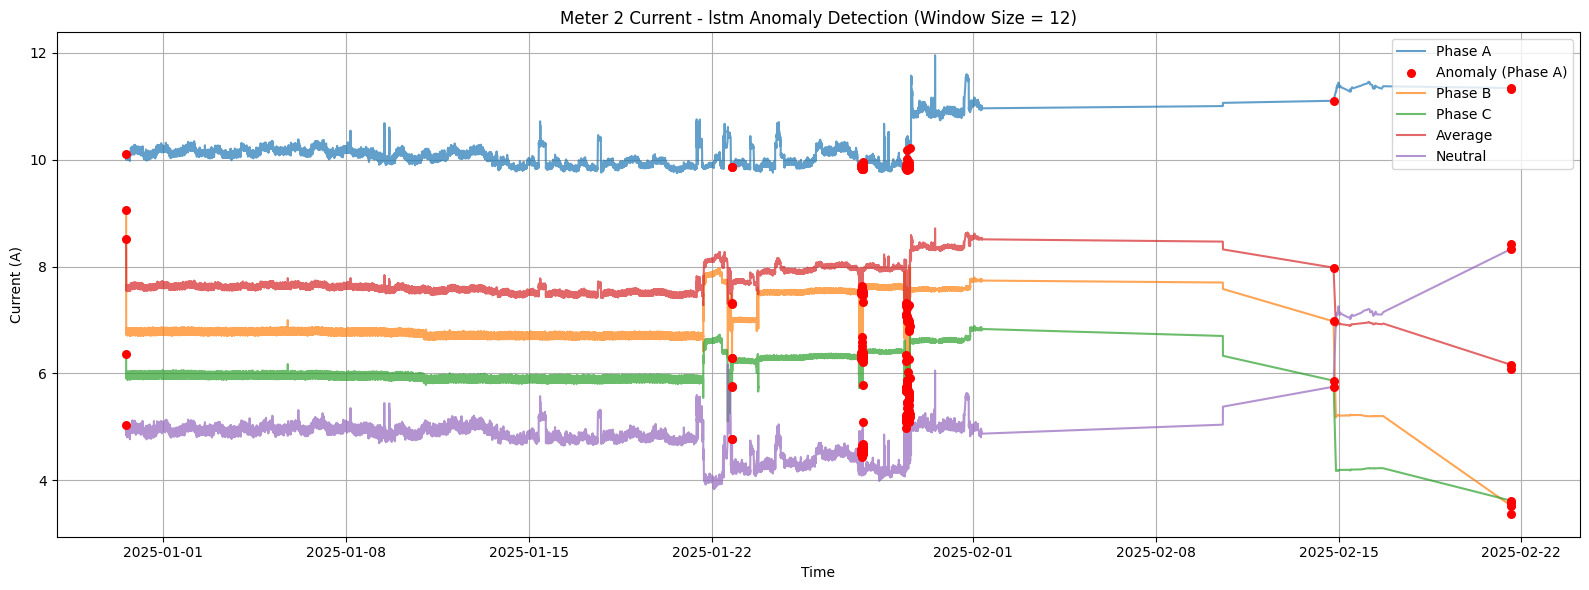

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Supervisor anomaly intervals (Meter 2 Current) — already known
supervisor_anomalies_i = [
    # January anomalies
    (pd.Timestamp('2025-01-04 06:40'), pd.Timestamp('2025-01-04 06:42')),
    (pd.Timestamp('2025-01-04 10:33'), pd.Timestamp('2025-01-04 10:35')),

    # January 9
    (pd.Timestamp('2025-01-09 10:55'), pd.Timestamp('2025-01-09 11:00')),  # ia
    (pd.Timestamp('2025-01-09 10:55'), pd.Timestamp('2025-01-09 11:00')),  # in
    (pd.Timestamp('2025-01-09 11:02'), pd.Timestamp('2025-01-09 11:06')),  # ia
    (pd.Timestamp('2025-01-09 11:02'), pd.Timestamp('2025-01-09 11:06')),  # in
    (pd.Timestamp('2025-01-09 15:24'), pd.Timestamp('2025-01-09 15:28')),  # ia
    (pd.Timestamp('2025-01-09 15:24'), pd.Timestamp('2025-01-09 15:28')),  # in
    (pd.Timestamp('2025-01-09 15:31'), pd.Timestamp('2025-01-09 15:34')),  # ia
    (pd.Timestamp('2025-01-09 15:31'), pd.Timestamp('2025-01-09 15:34')),  # in

    # January 15
    (pd.Timestamp('2025-01-15 08:52'), pd.Timestamp('2025-01-15 08:54')),  # ia
    (pd.Timestamp('2025-01-15 08:52'), pd.Timestamp('2025-01-15 08:54')),  # in
    (pd.Timestamp('2025-01-15 15:22'), pd.Timestamp('2025-01-15 15:24')),  # ia
    (pd.Timestamp('2025-01-15 15:22'), pd.Timestamp('2025-01-15 15:24')),  # in

    # January 22
    (pd.Timestamp('2025-01-22 14:27'), pd.Timestamp('2025-01-22 14:40')),  # all params
    (pd.Timestamp('2025-01-22 17:21'), pd.Timestamp('2025-01-22 17:24')),  # all params

    # January 23
    (pd.Timestamp('2025-01-23 11:21'), pd.Timestamp('2025-01-23 11:24')),  # ia
    (pd.Timestamp('2025-01-23 11:21'), pd.Timestamp('2025-01-23 11:24')),  # in
    (pd.Timestamp('2025-01-23 14:37'), pd.Timestamp('2025-01-23 14:40')),  # ia
    (pd.Timestamp('2025-01-23 14:37'), pd.Timestamp('2025-01-23 14:40')),  # in

    # January 27
    (pd.Timestamp('2025-01-27 15:31'), pd.Timestamp('2025-01-27 15:38')),  # i
    (pd.Timestamp('2025-01-27 15:31'), pd.Timestamp('2025-01-27 15:38')),  # ib
    (pd.Timestamp('2025-01-27 15:31'), pd.Timestamp('2025-01-27 15:38')),  # ic
    (pd.Timestamp('2025-01-27 15:31'), pd.Timestamp('2025-01-27 15:38')),  # in
    (pd.Timestamp('2025-01-27 17:20'), pd.Timestamp('2025-01-27 17:23')),  # ib
    (pd.Timestamp('2025-01-27 17:30'), pd.Timestamp('2025-01-27 17:35')),  # i
    (pd.Timestamp('2025-01-27 17:30'), pd.Timestamp('2025-01-27 17:35')),  # ib
    (pd.Timestamp('2025-01-27 17:30'), pd.Timestamp('2025-01-27 17:35')),  # ic
    (pd.Timestamp('2025-01-27 17:30'), pd.Timestamp('2025-01-27 17:35')),  # in
    (pd.Timestamp('2025-01-27 17:40'), pd.Timestamp('2025-01-27 17:42')),  # ib
    (pd.Timestamp('2025-01-27 17:56'), pd.Timestamp('2025-01-27 17:58')),  # ib
    (pd.Timestamp('2025-01-27 18:03'), pd.Timestamp('2025-01-27 18:08')),  # ib
    (pd.Timestamp('2025-01-27 18:03'), pd.Timestamp('2025-01-27 18:08')),  # in

    # January 28
    (pd.Timestamp('2025-01-28 14:17'), pd.Timestamp('2025-01-28 14:20')),  # ia
    (pd.Timestamp('2025-01-28 14:17'), pd.Timestamp('2025-01-28 14:20')),  # in
    (pd.Timestamp('2025-01-28 15:01'), pd.Timestamp('2025-01-28 15:04')),  # ia
    (pd.Timestamp('2025-01-28 15:01'), pd.Timestamp('2025-01-28 15:04')),  # in
    (pd.Timestamp('2025-01-28 15:11'), pd.Timestamp('2025-01-28 15:14')),  # ia
    (pd.Timestamp('2025-01-28 15:11'), pd.Timestamp('2025-01-28 15:14')),  # in
    (pd.Timestamp('2025-01-28 18:18'), pd.Timestamp('2025-01-28 18:21')),  # ia
    (pd.Timestamp('2025-01-28 18:18'), pd.Timestamp('2025-01-28 18:21')),  # in
    (pd.Timestamp('2025-01-28 18:21'), pd.Timestamp('2025-01-28 18:24')),  # ia
    (pd.Timestamp('2025-01-28 18:21'), pd.Timestamp('2025-01-28 18:24')),  # in
    (pd.Timestamp('2025-01-28 18:34'), pd.Timestamp('2025-01-28 18:37')),  # ia
    (pd.Timestamp('2025-01-28 18:34'), pd.Timestamp('2025-01-28 18:37')),  # in

    # January 29
    (pd.Timestamp('2025-01-29 08:56'), pd.Timestamp('2025-01-29 08:59')),  # i,ib,ic,in
    (pd.Timestamp('2025-01-29 09:09'), pd.Timestamp('2025-01-29 09:12')),  # i,ib,ic,in
    (pd.Timestamp('2025-01-29 09:36'), pd.Timestamp('2025-01-29 09:41')),  # i,ib,ic,in
    (pd.Timestamp('2025-01-29 10:01'), pd.Timestamp('2025-01-29 10:04')),  # i,ib,ic,in
    (pd.Timestamp('2025-01-29 10:07'), pd.Timestamp('2025-01-29 10:10')),  # i,ib,ic,in
    (pd.Timestamp('2025-01-29 10:27'), pd.Timestamp('2025-01-29 10:29')),  # ia,in
    (pd.Timestamp('2025-01-29 10:44'), pd.Timestamp('2025-01-29 10:47')),  # i,ib,ic,in
    (pd.Timestamp('2025-01-29 10:53'), pd.Timestamp('2025-01-29 10:55')),  # ib
    (pd.Timestamp('2025-01-29 11:05'), pd.Timestamp('2025-01-29 11:08')),  # i,ib,ic,in
    (pd.Timestamp('2025-01-29 11:08'), pd.Timestamp('2025-01-29 11:12')),  # i,ib,ic,in
    (pd.Timestamp('2025-01-29 11:18'), pd.Timestamp('2025-01-29 11:21')),  # i,ib,ic,in

    # January 30-31
    (pd.Timestamp('2025-01-30 13:07'), pd.Timestamp('2025-01-30 13:09')),  # ia,in
    (pd.Timestamp('2025-01-30 13:12'), pd.Timestamp('2025-01-30 13:14')),  # ia,in
    (pd.Timestamp('2025-01-31 20:08'), pd.Timestamp('2025-01-31 20:10')),  # ia,in

    # February anomalies
    (pd.Timestamp('2025-02-10 13:39'), pd.Timestamp('2025-02-10 13:41')),
    (pd.Timestamp('2025-02-14 19:21'), pd.Timestamp('2025-02-14 19:23')),
    (pd.Timestamp('2025-02-14 21:30'), pd.Timestamp('2025-02-14 21:33'))
]

def is_true_positive(ts, intervals):
    return any(start <= ts <= end for start, end in intervals)

def compare_anomalies(detected_indices, intervals):
    true_positives = [ts for ts in detected_indices if is_true_positive(ts, intervals)]
    false_positives = [ts for ts in detected_indices if not is_true_positive(ts, intervals)]
    false_negatives = [interval for interval in intervals if not any(is_true_positive(ts, [interval]) for ts in detected_indices)]
    return true_positives, false_positives, false_negatives

def window_dataframe_i(df, window_size=16):
    n_rows = df.shape[0]
    n_windows = n_rows // window_size
    df_trunc = df.iloc[:n_windows * window_size]
    data = df_trunc.values.reshape(n_windows, window_size, df.shape[1])
    new_columns = []
    for col in df.columns:
        for i in range(window_size):
            base = col.replace('met_', '').replace('_2', '')
            new_columns.append(f"{base}-2-{i+1}")
    data_2d = data.transpose(0, 2, 1).reshape(n_windows, -1)
    return pd.DataFrame(data_2d, columns=new_columns)

def build_autoencoder_i(input_dim):
    model = Sequential()
    model.add(Dense(64, input_shape=(input_dim,), kernel_regularizer=regularizers.l2(1e-4)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.1))
    model.add(Dense(32, kernel_regularizer=regularizers.l2(1e-4)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(16, kernel_regularizer=regularizers.l2(1e-4)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(64))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(input_dim, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    return model

# --- CONFIGURATION ---
best_window_i = 12
best_model_i = "lstm"
current_phases_clean = ['ia', 'ib', 'ic', 'i', 'in']

# --- Prepare Data ---
df_i_met2 = df_met2[['met_ia_2', 'met_ib_2', 'met_ic_2', 'met_i_2', 'met_in_2']].copy()
df_i_met2_win = window_dataframe_i(df_i_met2, window_size=best_window_i)
df_i_met2_win_plot = df_i_met2_win.copy()

for phase in current_phases_clean:
    cols = [f"{phase}-2-{i+1}" for i in range(best_window_i)]
    df_i_met2_win_plot[f"{phase}_mean"] = df_i_met2_win_plot[cols].mean(axis=1)

df_met2['data_hora'] = pd.to_datetime(df_met2['data_hora'])
df_met2 = df_met2.sort_values('data_hora')
timestamps_i = df_met2['data_hora'].sort_values().values
n_windows_i = len(df_i_met2_win_plot)
window_timestamps_i = [timestamps_i[(i+1)*best_window_i - 1] for i in range(n_windows_i)]
df_i_met2_win_plot['window_time'] = pd.to_datetime(window_timestamps_i)
df_i_met2_win_plot = df_i_met2_win_plot.set_index('window_time')

# --- Train/Test Split ---
test_start_i = pd.to_datetime('2024-12-29')
test_end_i = pd.to_datetime('2025-02-23')
test_mask_i = (df_i_met2_win_plot.index >= test_start_i) & (df_i_met2_win_plot.index <= test_end_i)
df_test_i = df_i_met2_win_plot[test_mask_i].copy()
df_train_i = df_i_met2_win_plot[~test_mask_i].copy()

X_train_i = df_train_i.drop(columns=[c for c in df_train_i.columns if c.endswith('_mean')])
X_test_i = df_test_i.drop(columns=[c for c in df_test_i.columns if c.endswith('_mean')])

# --- Model Training ---
scaler_i = StandardScaler()
X_train_i_scaled = scaler_i.fit_transform(X_train_i)
X_test_i_scaled = scaler_i.transform(X_test_i)

model_i = build_autoencoder_i(X_train_i_scaled.shape[1])
model_i.fit(X_train_i_scaled, X_train_i_scaled, epochs=15, batch_size=32, validation_split=0.1,
            callbacks=[EarlyStopping(patience=10, restore_best_weights=True)], verbose=1)

recon_i = model_i.predict(X_test_i_scaled)
errors_i = np.mean(np.square(X_test_i_scaled - recon_i), axis=1)

# --- Anomaly Detection ---
threshold_i = np.percentile(errors_i, 99.8)
anomalies_i = errors_i > threshold_i
df_test_i['anomaly_score'] = errors_i
df_test_i['predicted_label'] = anomalies_i.astype(int)

# --- Plot ---
current_labels = ['Phase A', 'Phase B', 'Phase C', 'Average', 'Neutral']
plt.figure(figsize=(16, 6))
for phase, label in zip(current_phases_clean, current_labels):
    plt.plot(df_test_i.index, df_test_i[f"{phase}_mean"], label=label, alpha=0.7)
    plt.scatter(
        df_test_i.index[df_test_i['predicted_label'] == 1],
        df_test_i.loc[df_test_i['predicted_label'] == 1, f"{phase}_mean"],
        color='red', s=30, zorder=10, label=f"Anomaly ({label})" if phase == current_phases_clean[0] else ""
    )
plt.title(f"Meter 2 Current - {best_model_i} Anomaly Detection (Window Size = {best_window_i})")
plt.xlabel("Time")
plt.ylabel("Current (A)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:

# --- Evaluation ---
predicted_anomaly_indices_i = df_test_i.index[df_test_i['predicted_label'] == 1]
tp_i, fp_i, fn_i = compare_anomalies(predicted_anomaly_indices_i, supervisor_anomalies_i)

summary_i = pd.DataFrame({
    "Model": [best_model_i],
    "Window Size": [best_window_i],
    "Total Detected": [len(predicted_anomaly_indices_i)],
    "True Positives": [len(tp_i)],
    "False Positives": [len(fp_i)],
    "False Negatives": [len(fn_i)],
})
print("\nAnomaly Detection Performance Summary (Meter 2 Current):")
summary_i


Anomaly Detection Performance Summary (Meter 2 Current):


,Model,Window Size,Total Detected,True Positives,False Positives,False Negatives
0,lstm,12,45,5,40,57


#### **saving the model**

In [ ]:
from google.colab import drive
from joblib import dump
from tensorflow.keras.models import load_model
from tensorflow.keras.models import save_model
import os
from joblib import load

# === Step 1: Mount Drive ===
# from google.colab import drive
# drive.mount('/content/drive')

 # Save model and scaler
save_model(model_i, os.path.join(subset_dirs["meter2_current"], "autoencoder_model.keras"))
dump(scaler_i, os.path.join(subset_dirs["meter2_current"], "scaler.pkl"))


# (Optional) Save evaluation summary
voltage_summary.to_csv(os.path.join(subset_dirs["meter2_current"], "summary.csv"), index=False)


In [ ]:
# Base path where models are stored
base_dir = "/content/drive/MyDrive/anomaly_detection_project"

# Choose the subset you want to load
subset = "meter2_current"  # Change this to the subset you're testing

# Build full paths
model_path = os.path.join(base_dir, subset, "autoencoder_model.keras")
scaler_path = os.path.join(base_dir, subset, "scaler.pkl")

from tensorflow.keras.models import load_model
from joblib import load

# Load trained model
model = load_model(model_path)

# Load scaler
scaler = load(scaler_path)

print("✅ Model and scaler loaded successfully!")

✅ Model and scaler loaded successfully!
